In [1]:
# Phase 1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable, ALL
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import f
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, roc_curve, f1_score, \
    precision_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from imblearn.under_sampling import RandomUnderSampler
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
sns.set(
    rc={
        'axes.labelcolor': 'darkred',
        'font.family': 'serif',
        'lines.linewidth': 2.5,
    },
    style='darkgrid',
    context='notebook',
    palette='Spectral'
)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/m-laxman/dataset_term_project/main/bank-full.csv', sep=";")
pd.set_option('display.max_columns', None)
title_fontdict = {"font": "serif", "color": "blue"}
print(df.info())
print(df.head().round(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
   age           job  marital  education default  balance housing loan  \
0   58    management

In [4]:
# Renamed column 'y' to 'subscribed'
df.rename(columns={'y': 'subscribed'}, inplace=True)

print(df.info())

print(df.head().round(2))

print(df.describe().round(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  subscribed  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
   age           job  marital  education default  balance housing loan  \
0

In [5]:
# Find Missing Values
print(df.isna().values.any())
print(df.isna().sum())
print(f'Missing values : {df.isna().sum().sum()}')

False
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64
Missing values : 0


In [6]:
# Find dupicate
print(f'Duplicated rows : {df.duplicated().sum()}')

Duplicated rows : 0


In [7]:
# Check for unwanted Columns
categorical = []
for col in df.select_dtypes(include='object').columns:
    print(col, ':', df[col].nunique())
    categorical.append(col)

job : 12
marital : 3
education : 4
default : 2
housing : 2
loan : 2
contact : 3
month : 12
poutcome : 4
subscribed : 2


In [8]:
numerical = []
numerical_orig = []
for col in df.select_dtypes(exclude='object').columns:
    print(col, ':', df[col].nunique())
    numerical.append(col)
    numerical_orig.append(col)

age : 77
balance : 7168
day : 31
duration : 1573
campaign : 48
pdays : 559
previous : 41


In [9]:
print(numerical_orig)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


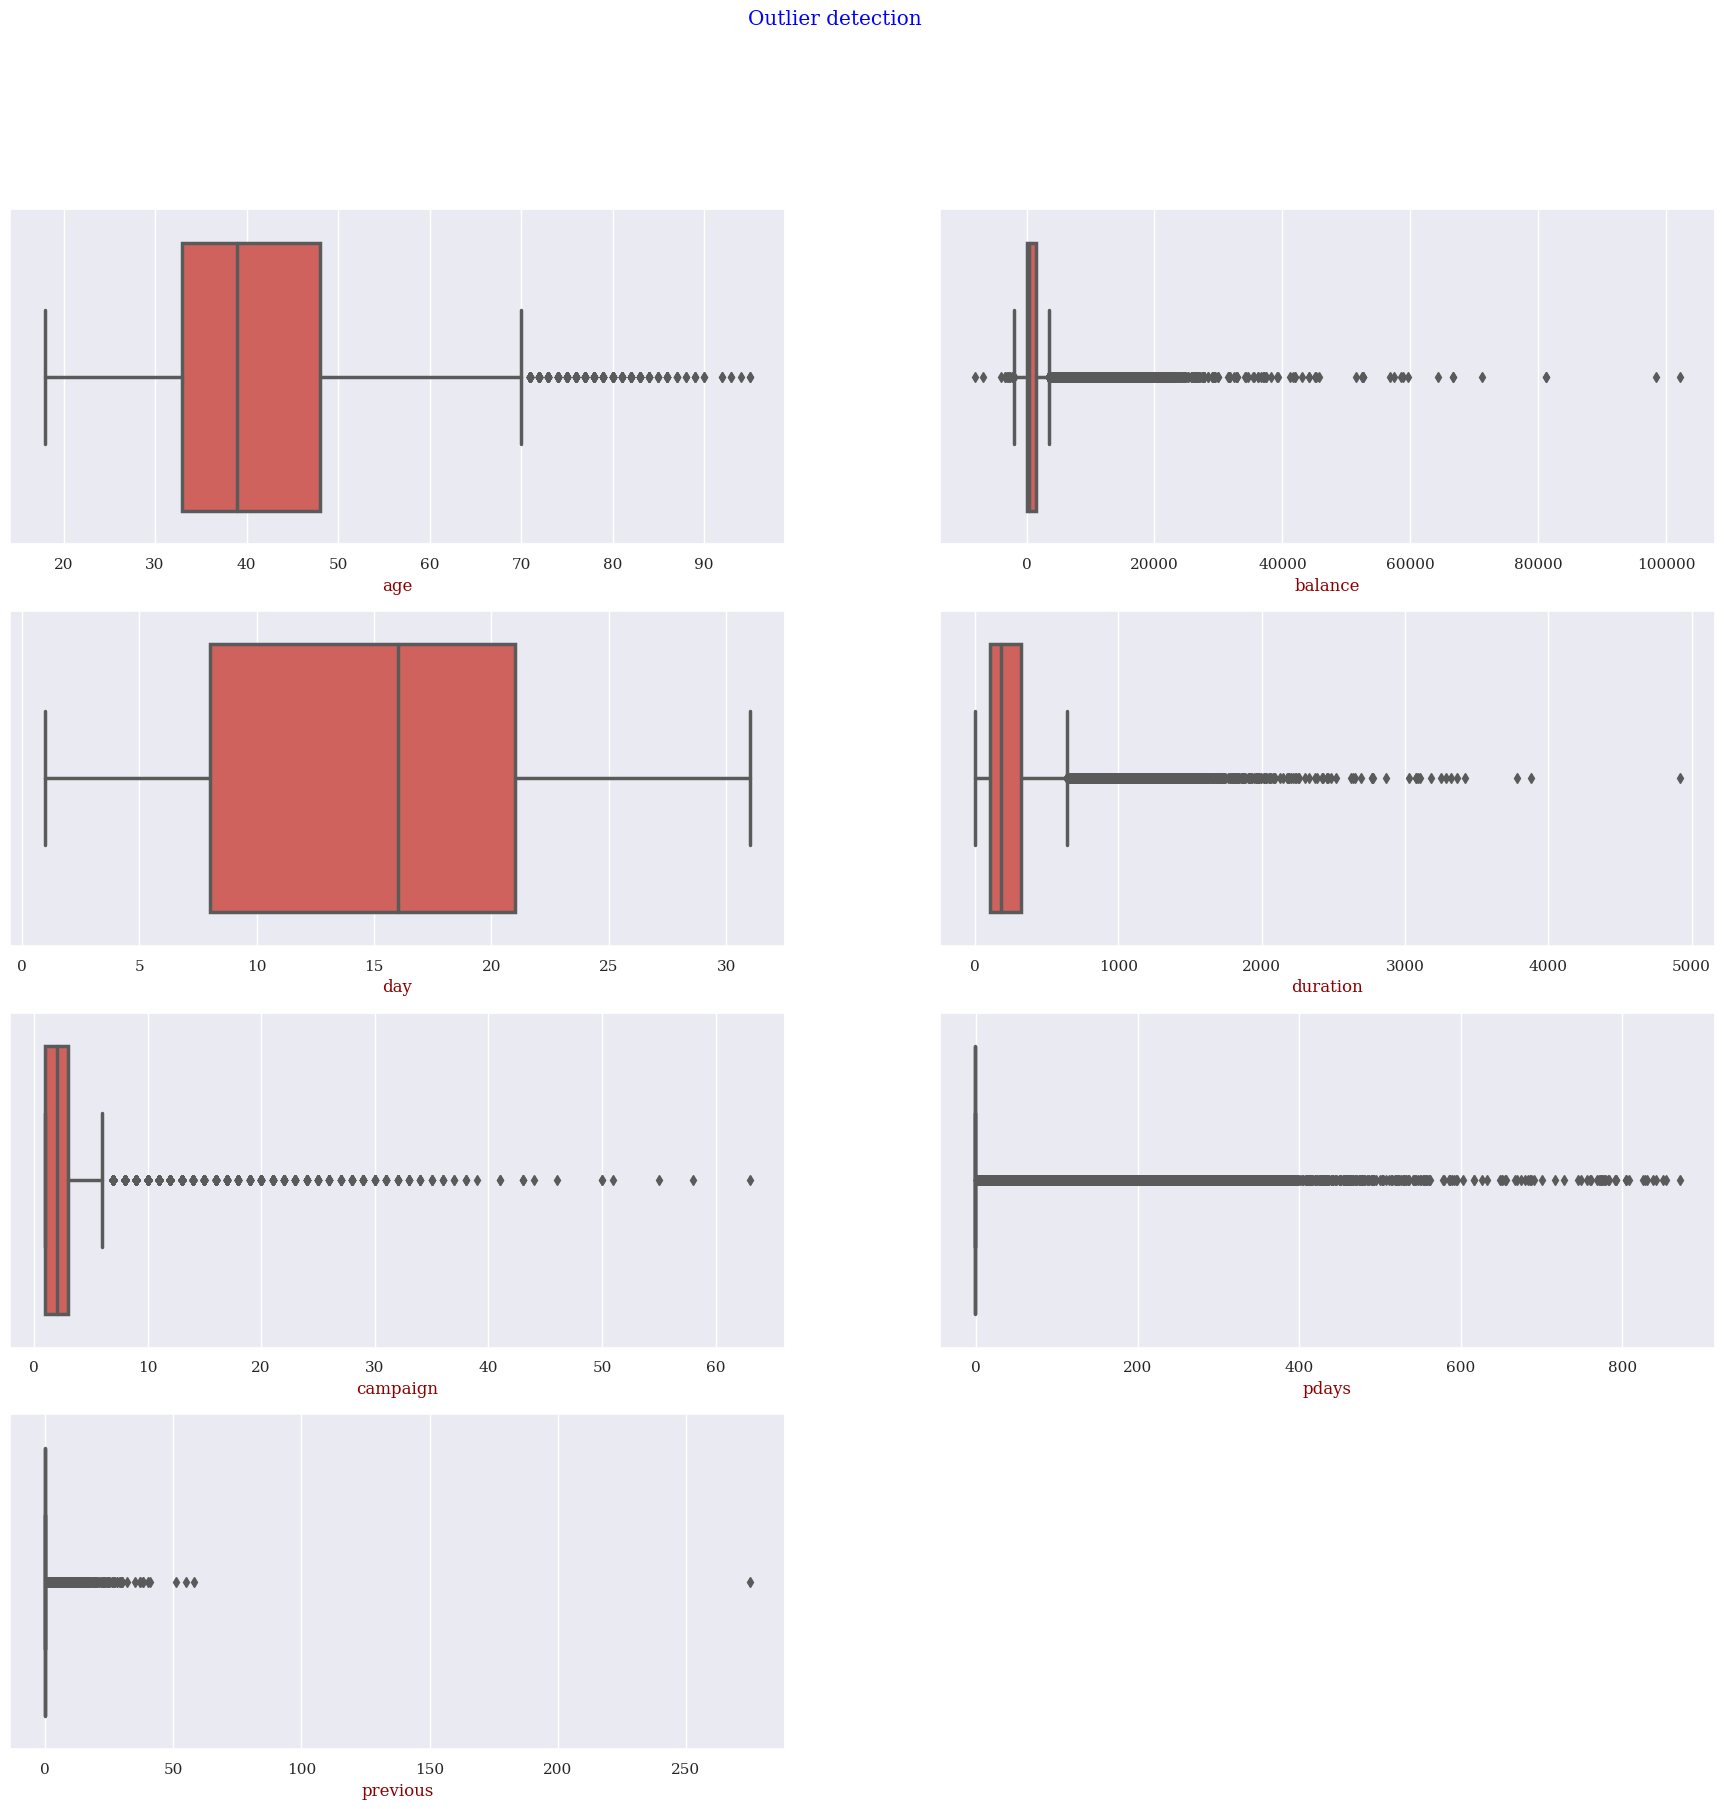

In [10]:
# Find Outliers in numerical features
# In this box plot analysis most of the numerical data show outliers, except for the "day" feature. These outliers are considered valid as they represent genuine data points. For instance, age outliers might appear, but this aligns with the reality that people can have ages that may seem unusual in the dataset.
plt.figure(figsize=(22, 20), facecolor='white')
for i, col in enumerate(numerical):
    ax = plt.subplot(4, 2, i + 1)
    sns.boxplot(data=df, x=col)
    plt.xlabel(col)
plt.suptitle(f'Outlier detection', fontdict=title_fontdict)
plt.show()

In [11]:
categorical_features = []
for col in df.select_dtypes(include='object').columns:
    print(col, ':', df[col].unique())
    categorical_features.append(col)
categorical_features.remove('subscribed')

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : ['married' 'single' 'divorced']
education : ['tertiary' 'secondary' 'unknown' 'primary']
default : ['no' 'yes']
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome : ['unknown' 'failure' 'other' 'success']
subscribed : ['no' 'yes']


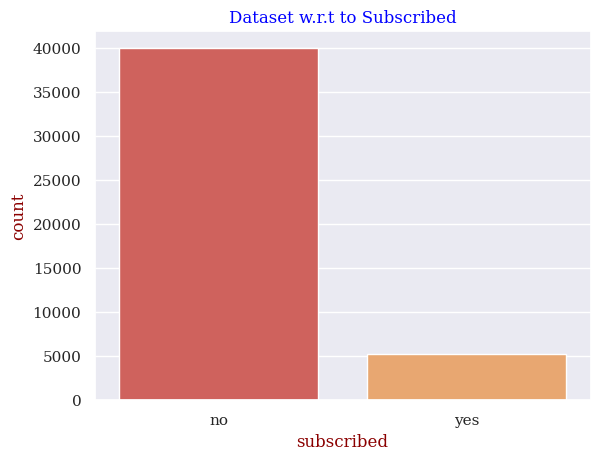

In [12]:
# Check the Data set is balanced or not based wrt target values in classification
sns.countplot(data=df, x='subscribed')
plt.title(f'Dataset w.r.t to Subscribed', title_fontdict)
plt.show()

X = df.drop('subscribed', axis=1)
y = df['subscribed']

In [13]:
# Encoding
categorical_one_hot = []  # ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
categorical_label = []  # ['job', 'month']
for col in categorical_features:
    if X[col].nunique() < 5:
        categorical_one_hot.append(col)
    else:
        categorical_label.append(col)
categorical_one_hot.remove('education')  # education ordinal must be label encoded
categorical_label.append('education')
numerical.extend(categorical_label)

X_encoded = pd.get_dummies(X, columns=categorical_one_hot, dtype=int, drop_first=True)
y_encoded = pd.get_dummies(y, columns='subscribed', dtype=int, drop_first=True)

label_encoder = LabelEncoder()
for col in categorical_label:
    label_encoder = LabelEncoder()
    X_encoded[col] = label_encoder.fit_transform(X_encoded[col])

# ['tertiary', 'secondary', 'unknown', 'primary'] [2, 1, 3, 0]
# ['management', 'technician', 'entrepreneur', 'blue-collar',
#        'unknown', 'retired', 'admin.', 'services', 'self-employed',
#        'unemployed', 'housemaid', 'student']
# [ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8]

y_encoded.rename(columns={'yes': 'subscribed'}, inplace=True)

encoded_features = ['job', 'month', 'education', 'marital_married', 'marital_single',
                    'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
                    'contact_unknown', 'poutcome_other', 'poutcome_success',
                    'poutcome_unknown']

In [14]:
categorical_all = ['day'] + encoded_features

Original observations: 45211
Resampled observations: 79844


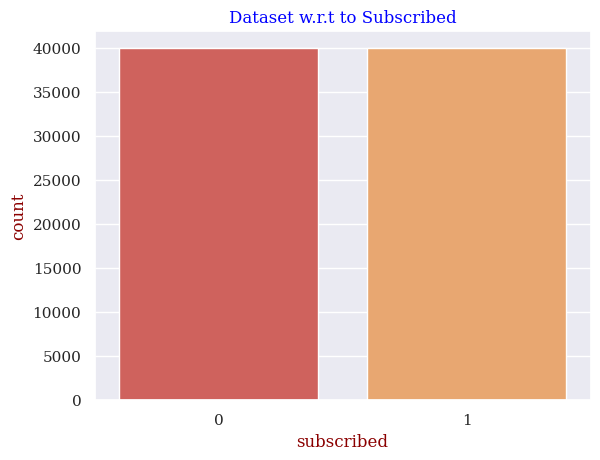

In [15]:
# Resampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

print(f'Original observations: {X_encoded.shape[0]}')
print(f'Resampled observations: {X_resampled.shape[0]}')
sns.countplot(data=df_resampled, x='subscribed')
plt.title(f'Dataset w.r.t to Subscribed', title_fontdict)
plt.show()

In [16]:
numerical = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

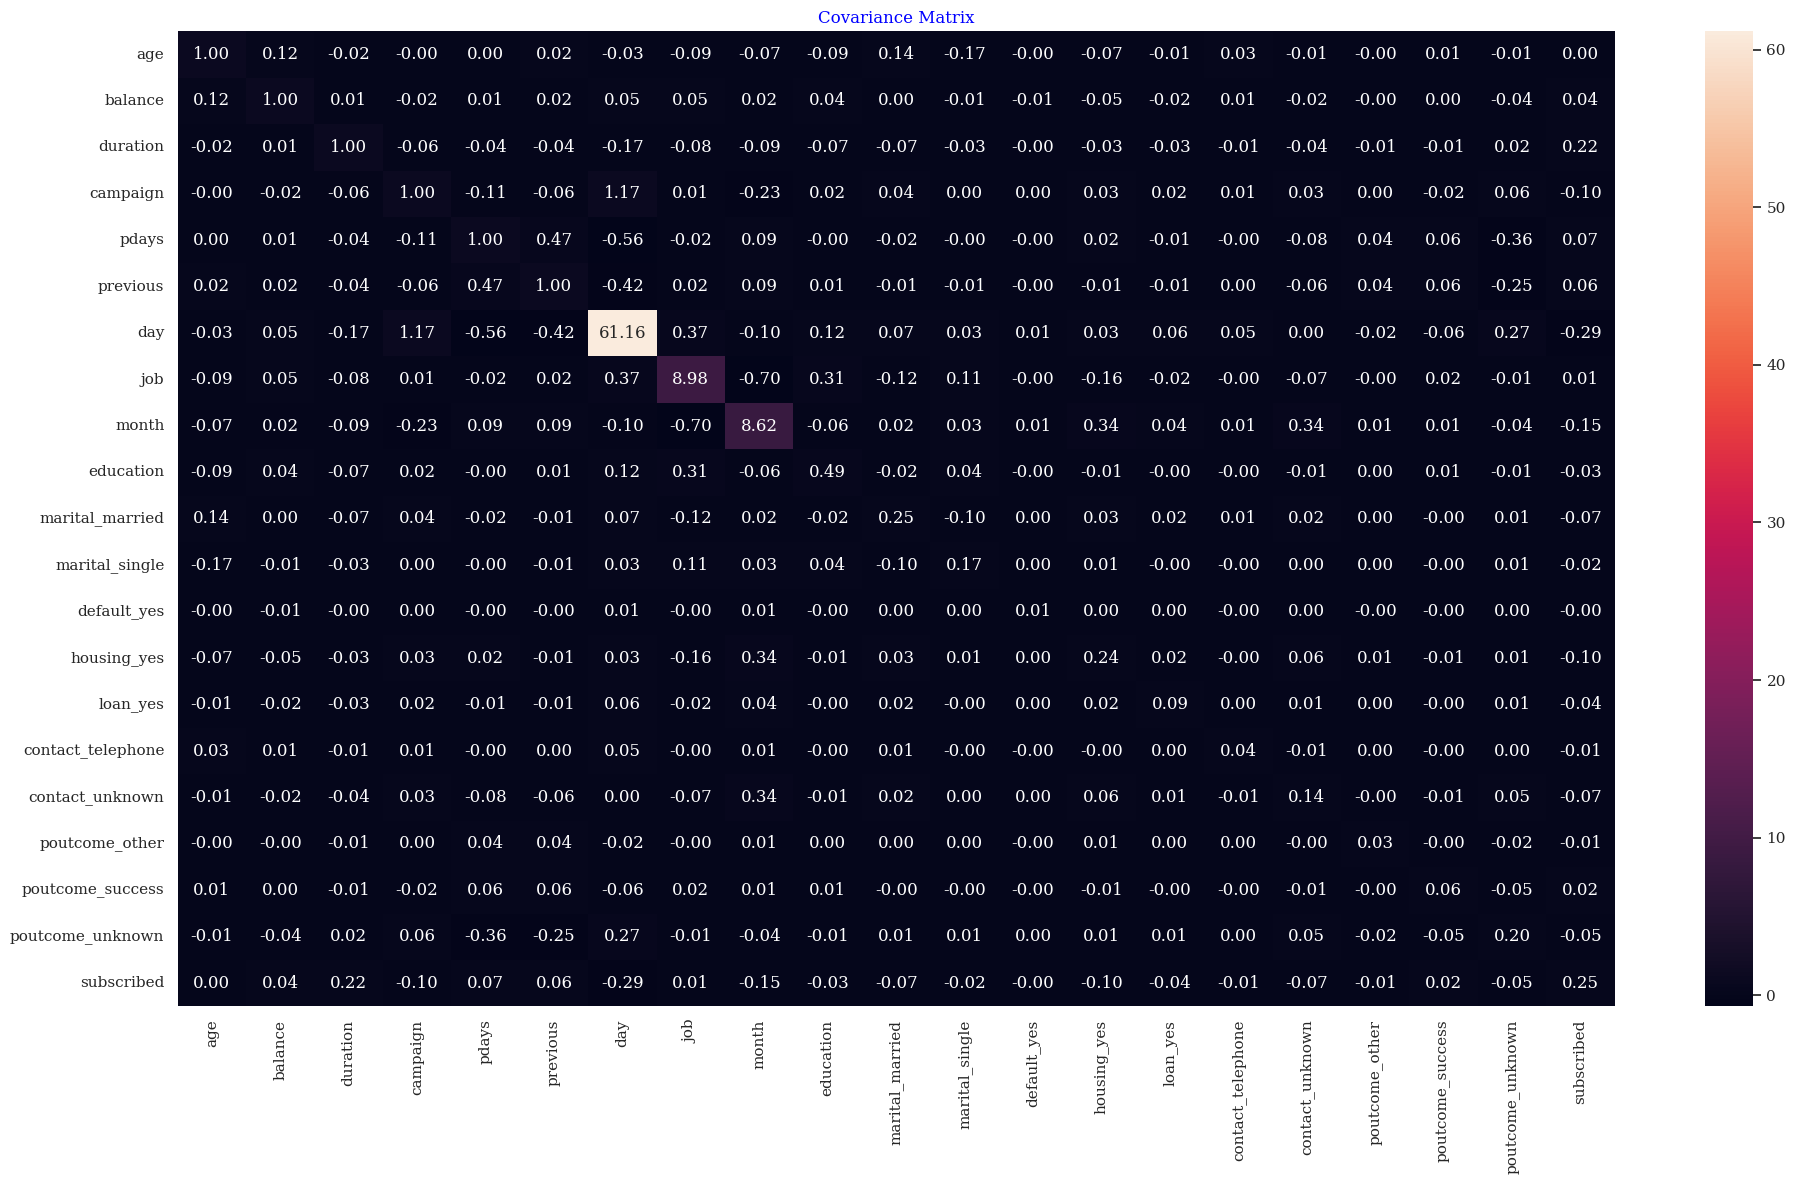

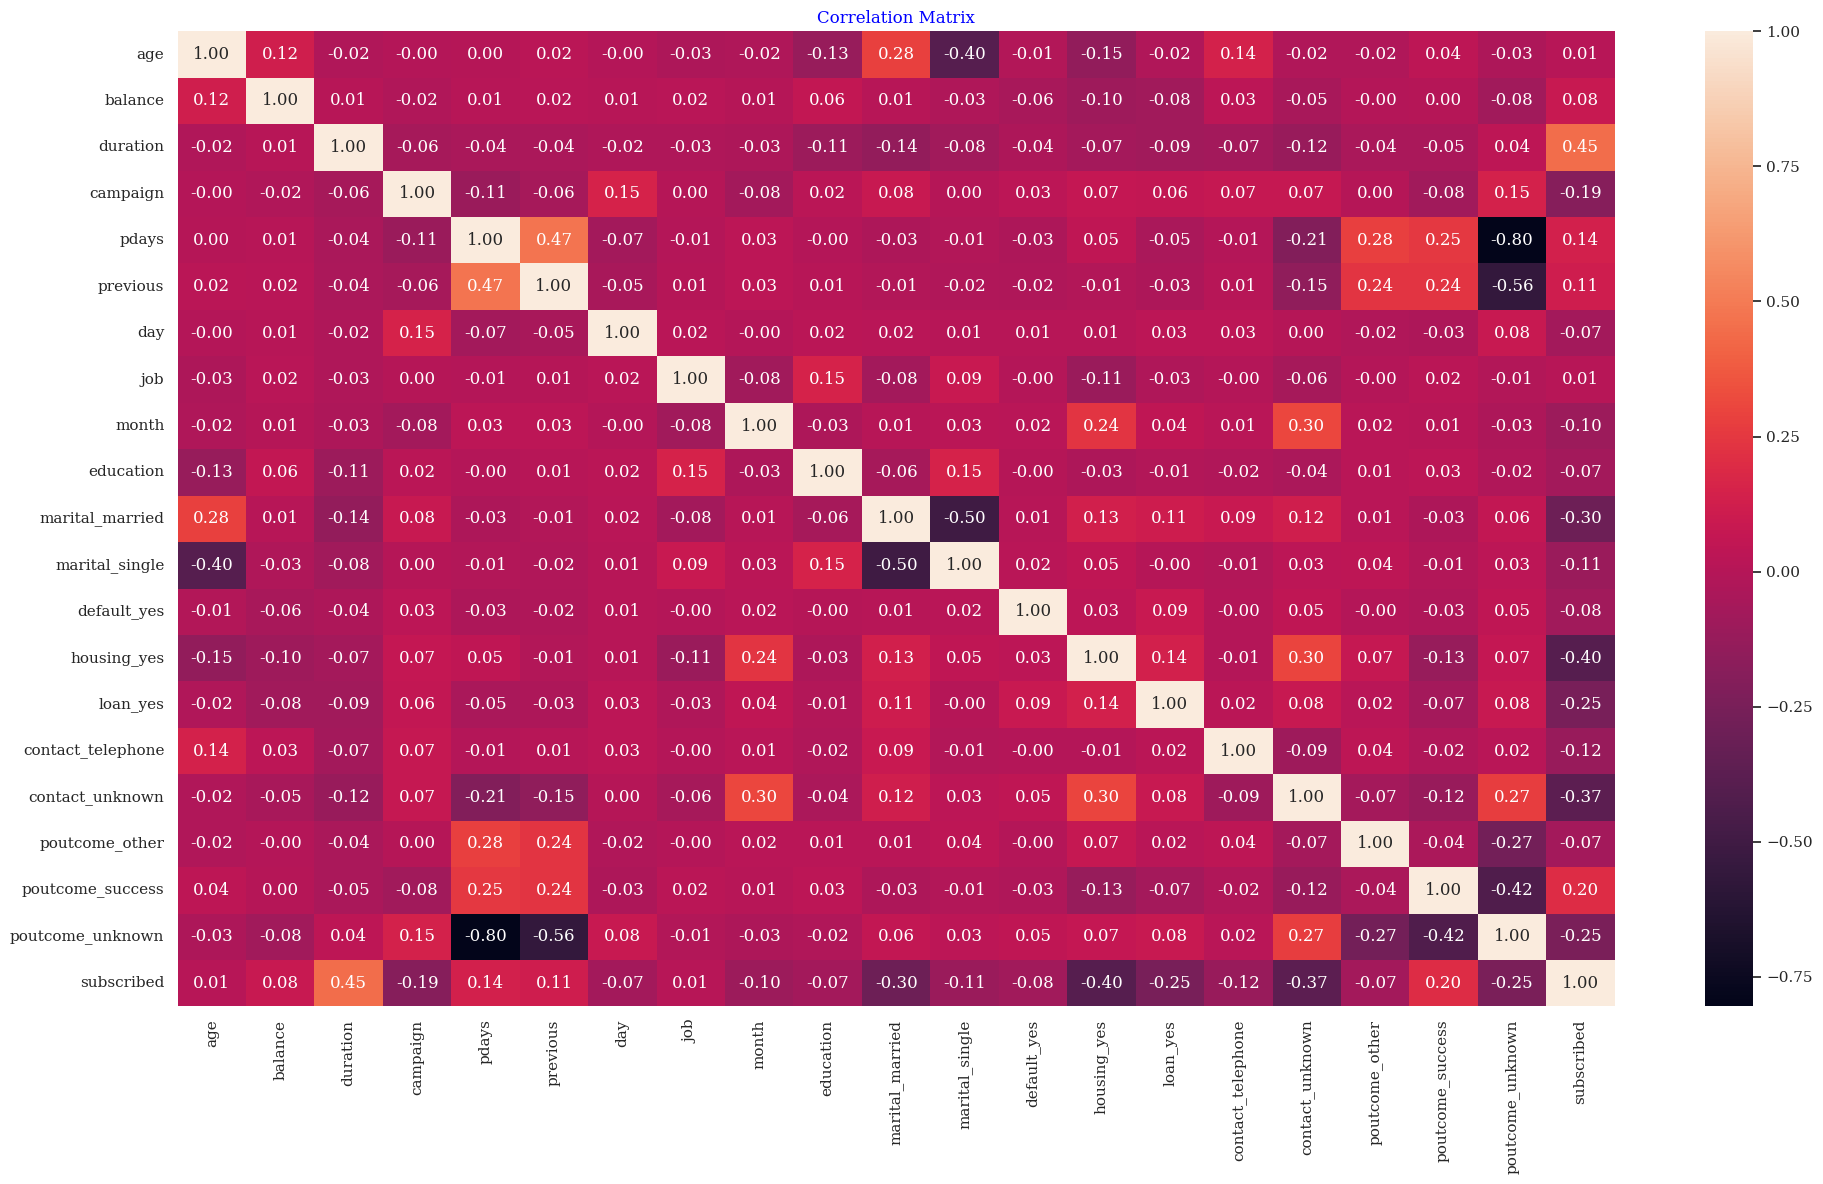

In [17]:
# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_resampled[numerical])
X_standardized = pd.DataFrame(X_standardized, columns=numerical)

X_std_res_enc = pd.concat([X_standardized, df_resampled[categorical_all]], axis=1)
y_res_enc = y_resampled.copy()

df_std_res_enc = pd.concat([X_std_res_enc, y_res_enc], axis=1)
cov_matrix = df_std_res_enc.cov()
corr_matrix = df_std_res_enc.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(cov_matrix, annot=True, fmt='.2f')
plt.title('Covariance Matrix', title_fontdict)
plt.tight_layout()
plt.show()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix', title_fontdict)
plt.tight_layout()
plt.show()

PCA: condition number for original: 178.66
SVD: No of components required to express 95%: 6
SVD: explained_variance_ratio of original data:
['0.63', '0.80', '0.91', '0.93', '0.94', '0.95', '0.97', '0.98', '0.98', '0.99', '0.99', '0.99', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00']
explained_variance_ratio of reduced data:
['0.71', '0.11', '0.09', '0.02', '0.01', '0.01']
PCA: No of components required to express 95%: 6
14 components are to be removed
explained_variance_ratio of original data:
['0.71', '0.11', '0.09', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']
explained_variance_ratio of reduced data:
['0.71', '0.11', '0.09', '0.02', '0.01', '0.01']


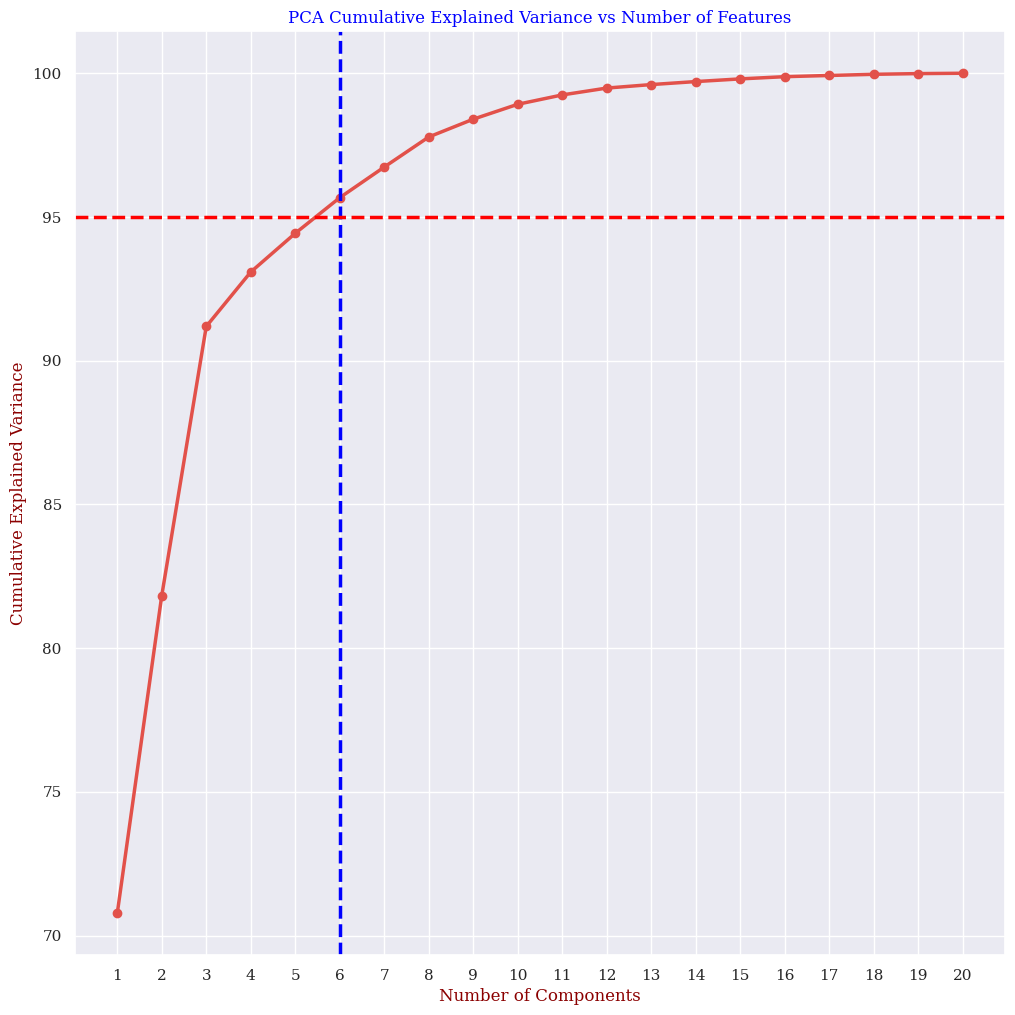

condition number for reduced: 7.56
+--------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                  PCA comparison table                                                                  |
+-------------------+----------------------------------------------------------------------------------+-------------------------------------------------+
|                   |                                 Original Dataset                                 |                 Reduced Dataset                 |
+-------------------+----------------------------------------------------------------------------------+-------------------------------------------------+
|  Condition number |                                      178.66                                      |                       7.56                      |
+-------------------+--------------

In [18]:
# Dimensionality reduction
# PCA & SVD
print(f'PCA: condition number for original: {np.linalg.cond(X_std_res_enc):.2f}')

svd_orig = TruncatedSVD(n_components=X_std_res_enc.shape[1])
svd_orig_trsf = svd_orig.fit_transform(X_std_res_enc)
svd_explained_variance_ratio = svd_orig.explained_variance_ratio_
svd_cumulative_explained_variance = np.cumsum(svd_explained_variance_ratio)
svd_threshold = 0.95
svd_n_components = np.argmax(svd_cumulative_explained_variance >= svd_threshold) + 1

print(f'SVD: No of components required to express 95%: {svd_n_components}')

print('SVD: explained_variance_ratio of original data:')
print([f'{num:.2f}' for num in svd_cumulative_explained_variance])

svd_reduced = PCA(n_components=svd_n_components, svd_solver='full')
svd_reduced_trsf = svd_reduced.fit_transform(X_std_res_enc)
print('explained_variance_ratio of reduced data:')
print([f'{num:.2f}' for num in svd_reduced.explained_variance_ratio_])

# plt.figure(figsize=(12, 12))
# plt.plot(range(1, len(svd_cumulative_explained_variance) + 1), svd_cumulative_explained_variance * 100, marker='o')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# ticks = np.arange(1, len(svd_cumulative_explained_variance) + 1)
# plt.xticks(ticks)
# plt.axvline(x=n_components, label='4 features', color='blue', linestyle='dashed')
# plt.axhline(y=95, label='95% threshold', color='red', linestyle='dashed')
# plt.title('SVD Cumulative Explained Variance vs Number of Features', title_fontdict)
# plt.show()

pca = PCA(n_components=X_std_res_enc.shape[1], svd_solver='full')
pca.fit(X_std_res_enc)
df_std_orig_pca = pca.transform(X_std_res_enc)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

threshold = 0.95
n_components = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f'PCA: No of components required to express 95%: {n_components}')

print(X_std_res_enc.shape[1] - n_components, 'components are to be removed')

print('explained_variance_ratio of original data:')
print([f'{num:.2f}' for num in explained_variance_ratio])

pca_reduced = PCA(n_components=n_components, svd_solver='full')
df_std_reduced_pca = pca_reduced.fit_transform(X_std_res_enc)
print('explained_variance_ratio of reduced data:')
print([f'{num:.2f}' for num in pca_reduced.explained_variance_ratio_])

plt.figure(figsize=(12, 12))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance * 100, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
ticks = np.arange(1, len(cumulative_explained_variance) + 1)
plt.xticks(ticks)
plt.axvline(x=n_components, label='4 features', color='blue', linestyle='dashed')
plt.axhline(y=95, label='95% threshold', color='red', linestyle='dashed')
plt.title('PCA Cumulative Explained Variance vs Number of Features', title_fontdict)
plt.show()

print(f'condition number for reduced: {np.linalg.cond(df_std_reduced_pca):.2f}')

singular_values_formatted = ', '.join([f'{value:.2f}' for value in svd_reduced.singular_values_])
# displaying first 10
singular_values_formatted_orig = ', '.join([f'{value:.2f}' for value in svd_orig.singular_values_[:10]])

pca_table = PrettyTable()
pca_table.field_names = ['', 'Original Dataset', 'Reduced Dataset']
pca_table.add_row(
    ['Condition number', f'{np.linalg.cond(X_std_res_enc):.2f}', f'{np.linalg.cond(df_std_reduced_pca):.2f}'])
pca_table.add_row(['Singular Values', f'{singular_values_formatted_orig}', f'{singular_values_formatted}'])
pca_table.add_row(['No. of components', X_std_res_enc.shape[1], n_components])
pca_table.float_format = ".2"
pca_table.hrules = ALL
print(pca_table.get_string(title='PCA comparison table'))


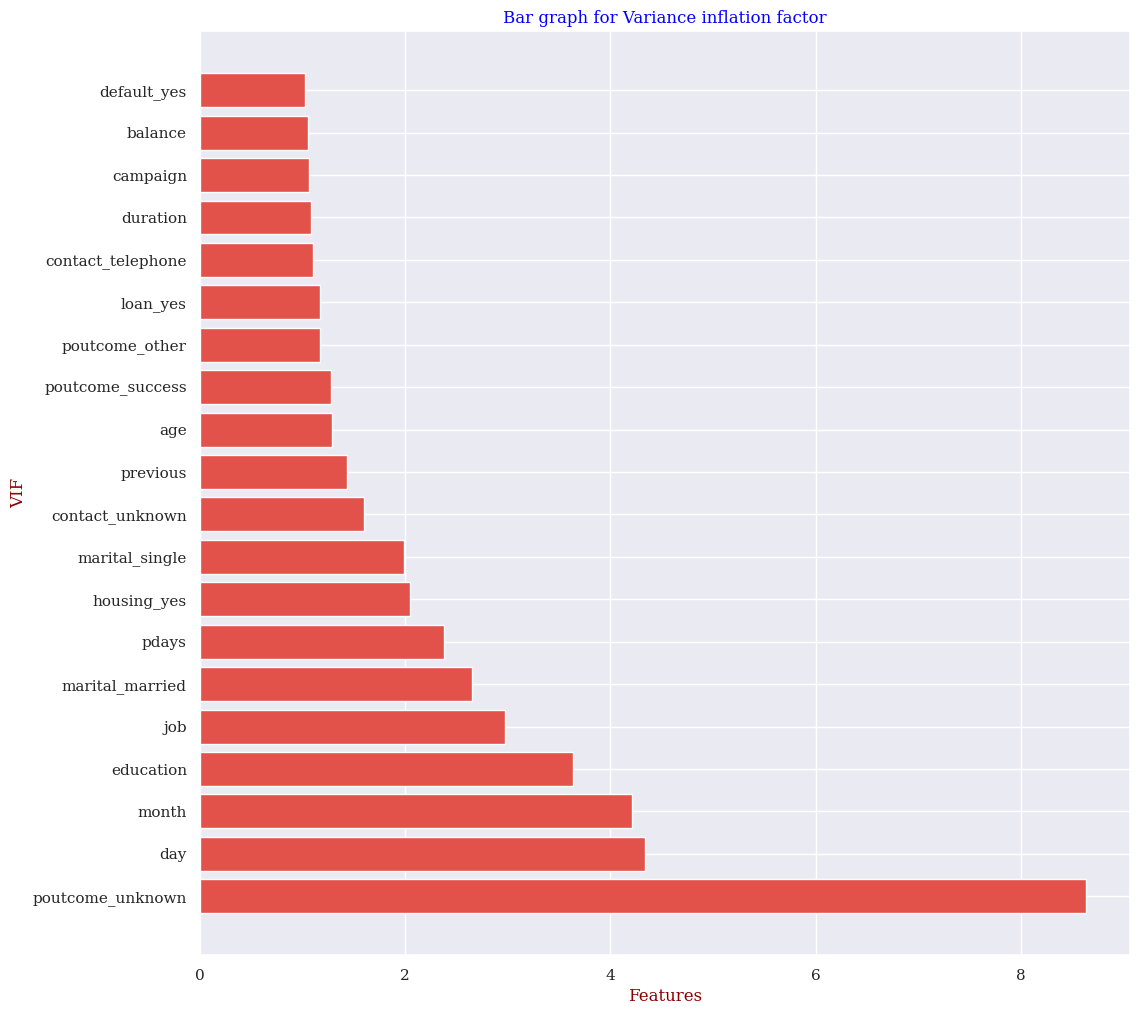

+----------------------------------------+
| Variance Inflation Factor (VIF) values |
+------------------------------+---------+
|           Features           |   VIF   |
+------------------------------+---------+
|       poutcome_unknown       |   8.63  |
+------------------------------+---------+
|             day              |   4.33  |
+------------------------------+---------+
|            month             |   4.21  |
+------------------------------+---------+
|          education           |   3.63  |
+------------------------------+---------+
|             job              |   2.97  |
+------------------------------+---------+
|       marital_married        |   2.65  |
+------------------------------+---------+
|            pdays             |   2.37  |
+------------------------------+---------+
|         housing_yes          |   2.05  |
+------------------------------+---------+
|        marital_single        |   1.99  |
+------------------------------+---------+
|       con

In [19]:
# VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_std_res_enc.columns
vif_values = []

for i in range(X_std_res_enc.shape[1]):
    vif_values.append(variance_inflation_factor(X_std_res_enc.values, i))

vif_data['VIF'] = vif_values

vif_data.sort_values('VIF', ascending=False, inplace=True)
# print('Variance inflation factor values:\n', vif_data.round(2))
plt.figure(figsize=(12, 12))
plt.barh(y=vif_data['feature'], width=vif_data['VIF'])
plt.xlabel('Features')
plt.ylabel('VIF')
plt.title('Bar graph for Variance inflation factor', title_fontdict)
plt.show()

vif_table = PrettyTable()
vif_table.field_names = ['Features', 'VIF']

for idx, row in vif_data.iterrows():
    vif_table.add_row([row['feature'], f'{row["VIF"]:.2f}'])

vif_table.float_format = ".2"
vif_table.hrules = ALL
print(vif_table.get_string(title='Variance Inflation Factor (VIF) values'))

high_vif_features = vif_data[vif_data['VIF'] > 5]['feature'].tolist()
print(high_vif_features)

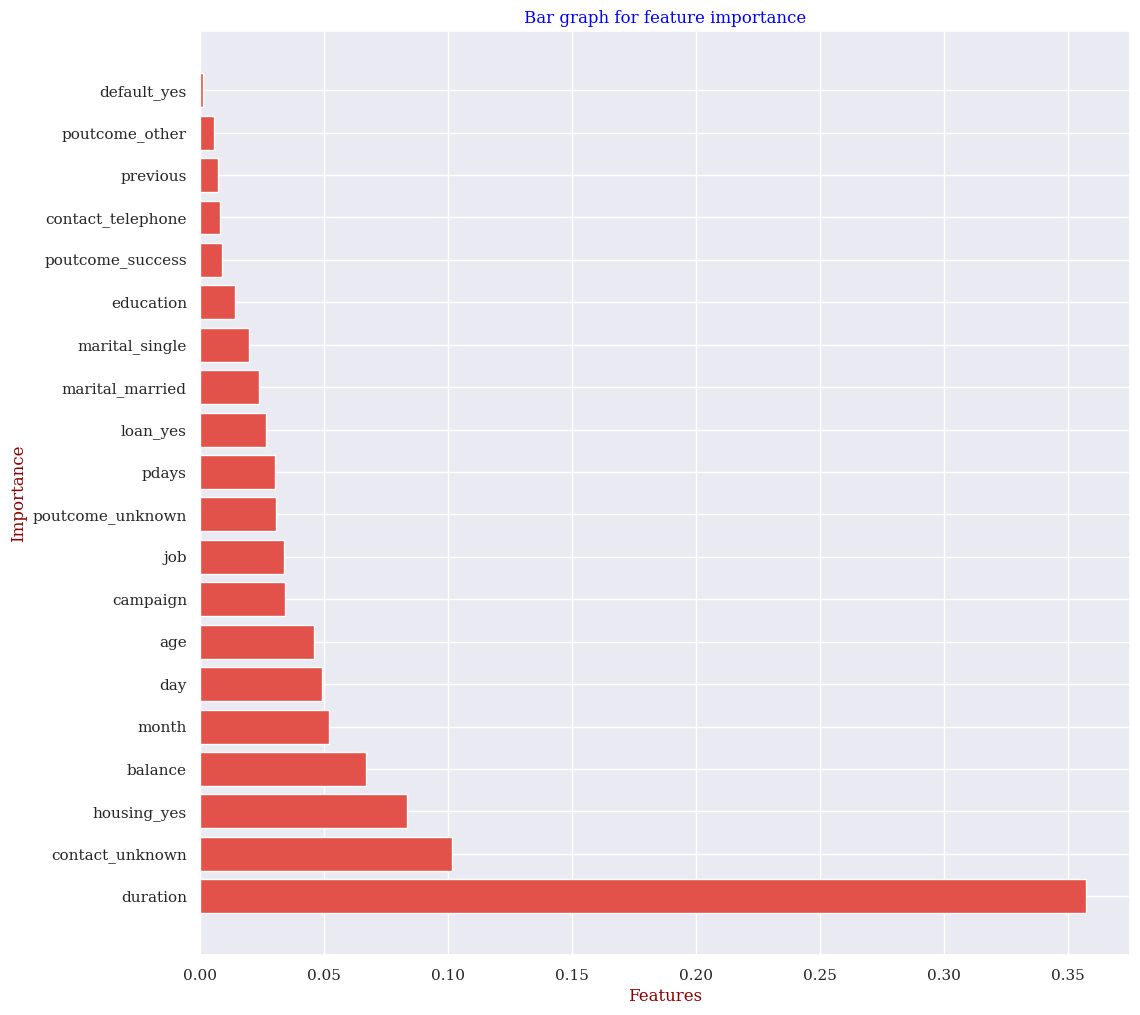

+-----------------------------------+
| Random Forest Feature Importances |
+--------------------+--------------+
|      Features      |  Importance  |
+--------------------+--------------+
|      duration      |     0.36     |
+--------------------+--------------+
|  contact_unknown   |     0.10     |
+--------------------+--------------+
|    housing_yes     |     0.08     |
+--------------------+--------------+
|      balance       |     0.07     |
+--------------------+--------------+
|       month        |     0.05     |
+--------------------+--------------+
|        day         |     0.05     |
+--------------------+--------------+
|        age         |     0.05     |
+--------------------+--------------+
|      campaign      |     0.03     |
+--------------------+--------------+
|        job         |     0.03     |
+--------------------+--------------+
|  poutcome_unknown  |     0.03     |
+--------------------+--------------+
|       pdays        |     0.03     |
+-----------

In [20]:
# Random forest
# X_std_res_enc = sm.add_constant(X_std_res_enc)
X_train, X_test, y_train, y_test = train_test_split(X_std_res_enc, y_res_enc,
                                                    shuffle=True, test_size=0.2,
                                                    random_state=5805)

model = RandomForestRegressor()
model.fit(X_train, y_train.values.ravel())
feature_imp = model.feature_importances_
feature_imp_dict = {'Features': X_train.columns, 'Importance': feature_imp}
rf_data = pd.DataFrame(feature_imp_dict)
rf_data.sort_values('Importance', ascending=False, inplace=True)
plt.figure(figsize=(12, 12))
plt.barh(y=rf_data['Features'], width=rf_data['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Bar graph for feature importance', title_fontdict)
plt.show()

# print('Random Forest Importances:\n', rf_data.round(2))

rf_table = PrettyTable()
rf_table.field_names = ['Features', 'Importance']

for index, row in rf_data.iterrows():
    rf_table.add_row([row['Features'], f'{row["Importance"]:.2f}'])
    
rf_table.float_format = ".2"
rf_table.hrules = ALL
print(rf_table.get_string(title='Random Forest Feature Importances'))

rf_data = rf_data.reset_index()
rf_data.drop('index', axis=1, inplace=True)
eliminated_features = []
features = X_train.columns.tolist()
threshold = 0.06
for i, j in enumerate(rf_data['Importance']):
    if j <= threshold:
        X_train.drop(rf_data['Features'][i], axis=1, inplace=True)
        X_test.drop(rf_data['Features'][i], axis=1, inplace=True)
        features.remove(rf_data['Features'][i])
        eliminated_features.append(rf_data['Features'][i])
print('Eliminated features:\n', eliminated_features)
print('Selected features:\n', features)

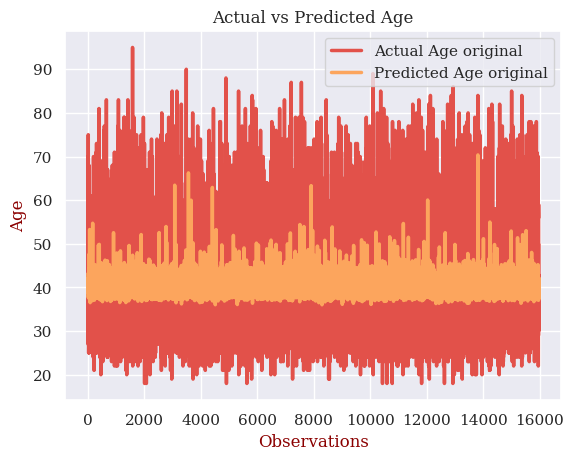

Mean Squared Error(MSE) for features selected using Random Forest Importance for the prediction of age: 0.980


In [21]:
X_std_res_enc_rf = X_std_res_enc.copy()
y_res_enc_rf = X_std_res_enc_rf['age']
X_std_res_enc_rf.drop(columns=['age'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_std_res_enc_rf, y_res_enc_rf,
                                                    shuffle=True, test_size=0.2,
                                                    random_state=5805)
eliminated_features_from_rf = ['day', 'campaign', 'pdays', 'job', 'poutcome_unknown', 'loan_yes', 'marital_married', 'marital_single', 'education', 'poutcome_success', 'contact_telephone', 'previous', 'poutcome_other', 'default_yes']
X_train.drop(eliminated_features_from_rf, axis=1, inplace=True)
X_test.drop(eliminated_features_from_rf, axis=1, inplace=True)

model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)
y_pred = pd.DataFrame(columns=['age'], data=y_pred)
y_pred = y_pred.reset_index()
y_pred.drop(['index'], axis=1, inplace=True)
y_pred_non_std = y_pred['age'] * X_resampled['age'].std() + X_resampled['age'].mean()
y_test = y_test.reset_index()
y_test.drop(['index'], axis=1, inplace=True)
y_test_non_std = y_test['age'] * X_resampled['age'].std() + X_resampled['age'].mean()
plt.plot(y_test_non_std, label='Actual Age original')
plt.plot(y_pred_non_std, label='Predicted Age original')
plt.xlabel('Observations')
plt.ylabel('Age')
plt.legend()
plt.title('Actual vs Predicted Age', title_fontdict)
plt.show()

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error(MSE) for features selected using Random Forest Importance for the prediction of age: {mse:.3f}')

table_cmp = PrettyTable()
table_cmp.field_names = ['R-squared', 'Adj R-squared', 'AIC', 'BIC', 'MSE']
table_cmp.add_row([model.rsquared, model.rsquared_adj, model.aic, model.bic, mse])

In [22]:
# Phase 2
# OLS
X_std_res_enc_lg = X_std_res_enc.copy()
# Since actual target is categorical, considering age as continous numerical varaible for OLS

X_std_res_enc_lg = sm.add_constant(X_std_res_enc)
y_res_enc_lg = X_std_res_enc_lg['age']
X_std_res_enc_lg.drop(columns=['age'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_std_res_enc_lg, y_res_enc_lg,
                                                    shuffle=True, test_size=0.2,
                                                    random_state=5805)

rows = []
eliminated_features_from_ols = []
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

X_train.drop(['day'], axis=1, inplace=True)
eliminated_features_from_ols.append('day')
rows.append(['day', model.aic, model.bic, model.pvalues['day'], model.rsquared_adj])
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     970.1
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:05:22   Log-Likelihood:                -82425.
No. Observations:               63875   AIC:                         1.649e+05
Df Residuals:                   63855   BIC:                         1.651e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2837      0.01

In [23]:
X_train.drop(['job'], axis=1, inplace=True)
eliminated_features_from_ols.append('job')
rows.append(['job', model.aic, model.bic, model.pvalues['job'], model.rsquared_adj])
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     1084.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:05:23   Log-Likelihood:                -82425.
No. Observations:               63875   AIC:                         1.649e+05
Df Residuals:                   63857   BIC:                         1.650e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2823      0.01

In [24]:
X_train.drop(['poutcome_other'], axis=1, inplace=True)
eliminated_features_from_ols.append('poutcome_other')
rows.append(['poutcome_other', model.aic, model.bic, model.pvalues['poutcome_other'], model.rsquared_adj])
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     1152.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:05:23   Log-Likelihood:                -82425.
No. Observations:               63875   AIC:                         1.649e+05
Df Residuals:                   63858   BIC:                         1.650e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2812      0.01

In [25]:
X_train.drop(['default_yes'], axis=1, inplace=True)
eliminated_features_from_ols.append('default_yes')
rows.append(['default_yes', model.aic, model.bic, model.pvalues['default_yes'], model.rsquared_adj])
model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     1229.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:05:23   Log-Likelihood:                -82425.
No. Observations:               63875   AIC:                         1.649e+05
Df Residuals:                   63859   BIC:                         1.650e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2812      0.01

In [26]:
X_train.drop(['pdays'], axis=1, inplace=True)
eliminated_features_from_ols.append('pdays')
rows.append(['pdays', model.aic, model.bic, model.pvalues['pdays'], model.rsquared_adj])
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     1317.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:05:23   Log-Likelihood:                -82425.
No. Observations:               63875   AIC:                         1.649e+05
Df Residuals:                   63860   BIC:                         1.650e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2829      0.01

In [27]:
X_train.drop(['month'], axis=1, inplace=True)
eliminated_features_from_ols.append('month')
rows.append(['month', model.aic, model.bic, model.pvalues['month'], model.rsquared_adj])
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     1418.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:05:23   Log-Likelihood:                -82425.
No. Observations:               63875   AIC:                         1.649e+05
Df Residuals:                   63861   BIC:                         1.650e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2782      0.01

In [28]:
X_train.drop(['poutcome_unknown'], axis=1, inplace=True)
eliminated_features_from_ols.append('poutcome_unknown')
rows.append(['poutcome_unknown', model.aic, model.bic, model.pvalues['poutcome_unknown'], model.rsquared_adj])
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     1536.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:05:23   Log-Likelihood:                -82427.
No. Observations:               63875   AIC:                         1.649e+05
Df Residuals:                   63862   BIC:                         1.650e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2645      0.00

In [29]:
X_train.drop(['campaign'], axis=1, inplace=True)
eliminated_features_from_ols.append('campaign')
rows.append(['campaign', model.aic, model.bic, model.pvalues['campaign'], model.rsquared_adj])
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     1675.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:05:23   Log-Likelihood:                -82430.
No. Observations:               63875   AIC:                         1.649e+05
Df Residuals:                   63863   BIC:                         1.650e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2660      0.00

In [30]:
X_train.drop(['loan_yes'], axis=1, inplace=True)
eliminated_features_from_ols.append('loan_yes')
rows.append(['loan_yes', model.aic, model.bic, model.pvalues['loan_yes'], model.rsquared_adj])
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     1841.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:05:23   Log-Likelihood:                -82433.
No. Observations:               63875   AIC:                         1.649e+05
Df Residuals:                   63864   BIC:                         1.650e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2647      0.00

In [31]:
# T test analysis
t_values = model.tvalues.tolist()
p_values = model.pvalues.tolist()
df_residuals = model.df_resid
df_model = model.df_model
f_statistic = model.fvalue

alpha = 0.05
significant_coefficients = [(t_values[i], p_values[i]) for i in range(len(t_values)) if p_values[i] < alpha]
print(significant_coefficients)

# F-test analysis
prob_f_statistic = f.sf(f_statistic, df_model, df_residuals)

print(f"Probability of F-statistic: {prob_f_statistic:.4f}")
if prob_f_statistic < alpha:
    print("Reject null hypothesis: Model is statistically significant.")
else:
    print("Fail to reject null hypothesis: Model is statistically insignificant.")

[(29.787923550859478, 1.1953484490537885e-193), (28.038787135973447, 6.068479144886866e-172), (-9.539984011090995, 1.476622757371267e-21), (3.721145244513273, 0.00019849124376651437), (-23.080746792156315, 2.1908565400607133e-117), (28.059301411478607, 3.434886260956519e-172), (-76.49204872555329, 0.0), (-40.228655252898676, 0.0), (35.1497450254515, 4.3205763690790654e-268), (10.353722113572063, 4.213774193587991e-25), (7.089632179582057, 1.358576230716445e-12)]
Probability of F-statistic: 0.0000
Reject null hypothesis: Model is statistically significant.


In [32]:
X_test.drop(eliminated_features_from_ols, axis=1, inplace=True)
print(eliminated_features_from_ols)
feature_table = PrettyTable()
feature_table.field_names = ['Removed feature', 'AIC', 'BIC', 'P-value', 'Adjusted R^2']
for i in range(len(rows)):
    feature_table.add_row(rows[i])
feature_table.hrules = ALL
feature_table.float_format = ".2"
print(feature_table.get_string(title='Feature table'))

['day', 'job', 'poutcome_other', 'default_yes', 'pdays', 'month', 'poutcome_unknown', 'campaign', 'loan_yes']
+-------------------------------------------------------------------+
|                           Feature table                           |
+------------------+-----------+-----------+---------+--------------+
| Removed feature  |    AIC    |    BIC    | P-value | Adjusted R^2 |
+------------------+-----------+-----------+---------+--------------+
|       day        | 164889.02 | 165070.32 |   0.99  |     0.22     |
+------------------+-----------+-----------+---------+--------------+
|       job        | 164887.02 | 165059.25 |   0.78  |     0.22     |
+------------------+-----------+-----------+---------+--------------+
|  poutcome_other  | 164885.10 | 165048.27 |   0.50  |     0.22     |
+------------------+-----------+-----------+---------+--------------+
|   default_yes    | 164883.56 | 165037.65 |   0.68  |     0.22     |
+------------------+-----------+-----------+------

Age = 0.265 + 0.098*balance - 0.034*duration + 0.013*previous - 0.117*education + 0.237*marital_married - 0.761*marital_single - 0.308*housing_yes + 0.633*contact_telephone + 0.103*contact_unknown + 0.107*poutcome_success


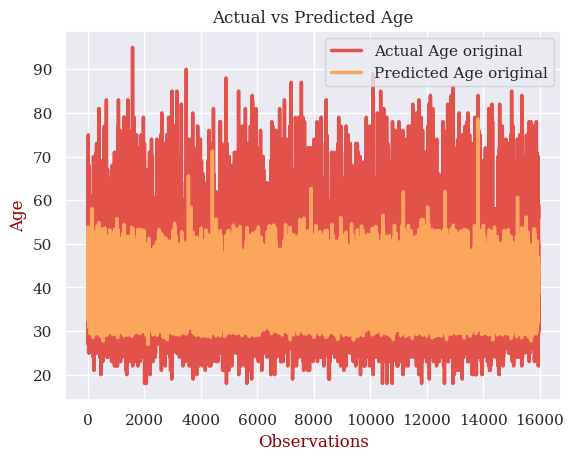

Mean Squared Error(MSE) for features selected using Backward stepwise Regression for the prediction of age:0.790
+----------------------------------------------------------+
|      Stepwise & Random forest regression comparison      |
+-----------+---------------+-----------+-----------+------+
| R-squared | Adj R-squared |    AIC    |    BIC    | MSE  |
+-----------+---------------+-----------+-----------+------+
|    0.03   |      0.03     | 178962.37 | 179007.69 | 0.98 |
+-----------+---------------+-----------+-----------+------+
|    0.22   |      0.22     | 164888.30 | 164988.01 | 0.79 |
+-----------+---------------+-----------+-----------+------+


In [33]:
coefficients = model.params[0:]
equation = f'Age = {coefficients[0]:.3f}'
for i in range(1, len(coefficients)):
    if coefficients[i] < 0:
        equation += ' -'
    else:
        equation += ' +'
    equation += f' {abs(coefficients[i]):.3f}*{coefficients.index[i]}'
print(equation)
y_pred = model.predict(X_test)
y_pred = pd.DataFrame(columns=['age'], data=y_pred)
y_pred = y_pred.reset_index()
y_pred.drop(['index'], axis=1, inplace=True)
y_pred_non_std = y_pred['age'] * X_resampled['age'].std() + X_resampled['age'].mean()
y_test = y_test.reset_index()
y_test.drop(['index'], axis=1, inplace=True)
y_test_non_std = y_test['age'] * X_resampled['age'].std() + X_resampled['age'].mean()
plt.plot(y_test_non_std, label='Actual Age original')
plt.plot(y_pred_non_std, label='Predicted Age original')
plt.xlabel('Observations')
plt.ylabel('Age')
plt.legend()
plt.title('Actual vs Predicted Age', title_fontdict)
plt.show()

Y_pred_non_std_ols = y_pred_non_std
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error(MSE) for features selected using Backward stepwise Regression for the prediction of age:{mse:.3f}')


table_cmp.hrules = ALL
table_cmp.float_format = ".2"
table_cmp.add_row([model.rsquared, model.rsquared_adj, model.aic, model.bic, mse])
print(table_cmp.get_string(title='Stepwise & Random forest regression comparison'))

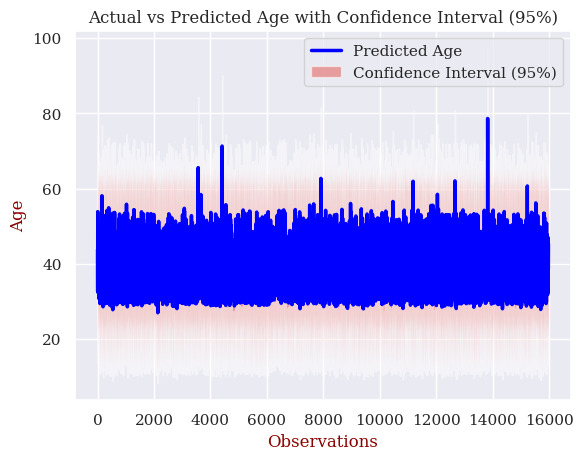

In [34]:
# Confidence Interval for OLS
model = sm.OLS(y_train, X_train).fit()
prediction_random = model.get_prediction(X_test)
predictions_summary_random = prediction_random.summary_frame(alpha=0.05)

lower_prediction_interval = predictions_summary_random['obs_ci_lower']
upper_prediction_interval = predictions_summary_random['obs_ci_upper']

lower_prediction_interval_original = (lower_prediction_interval * X_resampled['age'].std()) + X_resampled['age'].mean()
upper_prediction_interval_original = (upper_prediction_interval * X_resampled['age'].std()) + X_resampled['age'].mean()

plt.plot(Y_pred_non_std_ols, label='Predicted Age', color='blue')
plt.fill_between(y_test.index, lower_prediction_interval_original, upper_prediction_interval_original,
                 alpha=0.5, label='Confidence Interval (95%)')
plt.xlabel('Observations')
plt.ylabel('Age')
plt.legend()
plt.title('Actual vs Predicted Age with Confidence Interval (95%)', title_fontdict)
plt.show()

Age = 0.105 + 0.107*balance - 0.028*duration - 0.001*month - 0.302*housing_yes + 0.084*contact_unknown


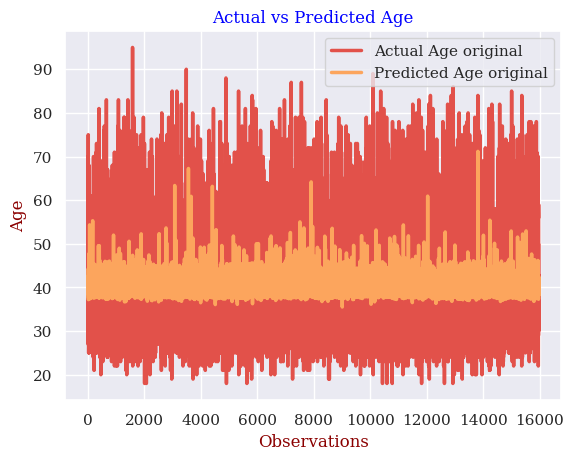

In [35]:
# Linear Regression using features obtained from Random forest importance
X_std_res_enc_lg = X_std_res_enc.copy()
# Since actual target is categorical, considering age as continous numerical varaible for Multiple Linear Regression
X_std_res_enc_lg = sm.add_constant(X_std_res_enc)
y_res_enc_lg = X_std_res_enc_lg['age']
X_std_res_enc_lg.drop(columns=['age'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_std_res_enc_lg, y_res_enc_lg,
                                                    shuffle=True, test_size=0.2,
                                                    random_state=5805)

X_train.drop(eliminated_features_from_rf, axis=1, inplace=True)
X_test.drop(eliminated_features_from_rf, axis=1, inplace=True)

multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(X_train, y_train)

y_test_pred = multiple_lin_reg.predict(X_test)

coefficients = multiple_lin_reg.coef_
equation = f'Age = {multiple_lin_reg.intercept_:.3f}'
for i in range(1, len(coefficients)):
    if coefficients[i] < 0:
        equation += ' -'
    else:
        equation += ' +'
    equation += f' {abs(coefficients[i]):.3f}*{X_train.columns[i]}'
print(equation)

y_pred = multiple_lin_reg.predict(X_test)
y_pred = pd.DataFrame(columns=['age'], data=y_pred)
y_pred = y_pred.reset_index()
y_pred.drop(['index'], axis=1, inplace=True)
y_pred_non_std = y_pred['age'] * X_resampled['age'].std() + X_resampled['age'].mean()
y_test = y_test.reset_index()
y_test.drop(['index'], axis=1, inplace=True)
y_test_non_std = y_test['age'] * X_resampled['age'].std() + X_resampled['age'].mean()
plt.plot(y_test_non_std, label='Actual Age original')
plt.plot(y_pred_non_std, label='Predicted Age original')
plt.xlabel('Observations')
plt.ylabel('Age')
plt.legend()
plt.title('Actual vs Predicted Age', title_fontdict)
plt.show()

In [36]:
# Phase 3
# DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X_std_res_enc, y_res_enc,
                                                    shuffle=True, test_size=0.2,
                                                    random_state=5805)
X_train.drop(eliminated_features, axis=1, inplace=True)
X_test.drop(eliminated_features, axis=1, inplace=True)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_predicted)
accuracy_test = accuracy_score(y_test, y_test_predicted)
print(f'Decision Tree Train accuracy :{accuracy_train:.2f}')
print(f'Decision Tree Test accuracy :{accuracy_test:.2f}')
importance = model.feature_importances_.round(2)
feature_imp_dict = {'Features': X_train.columns, 'Importance': importance}
dt_data = pd.DataFrame(feature_imp_dict)
dt_data.sort_values('Importance', ascending=False, inplace=True)
print(dt_data)
# least_important_feature = min(feature_importance, key=feature_importance.get)
# print(f"Feature to eliminate: {least_important_feature}")

Decision Tree Train accuracy :0.99
Decision Tree Test accuracy :0.82
          Features  Importance
1         duration        0.50
0          balance        0.30
3  contact_unknown        0.11
2      housing_yes        0.09


Best parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 40, 'splitter': 'best'}
Pre pruning Train accuracy :0.84
Pre pruning Test accuracy :0.84


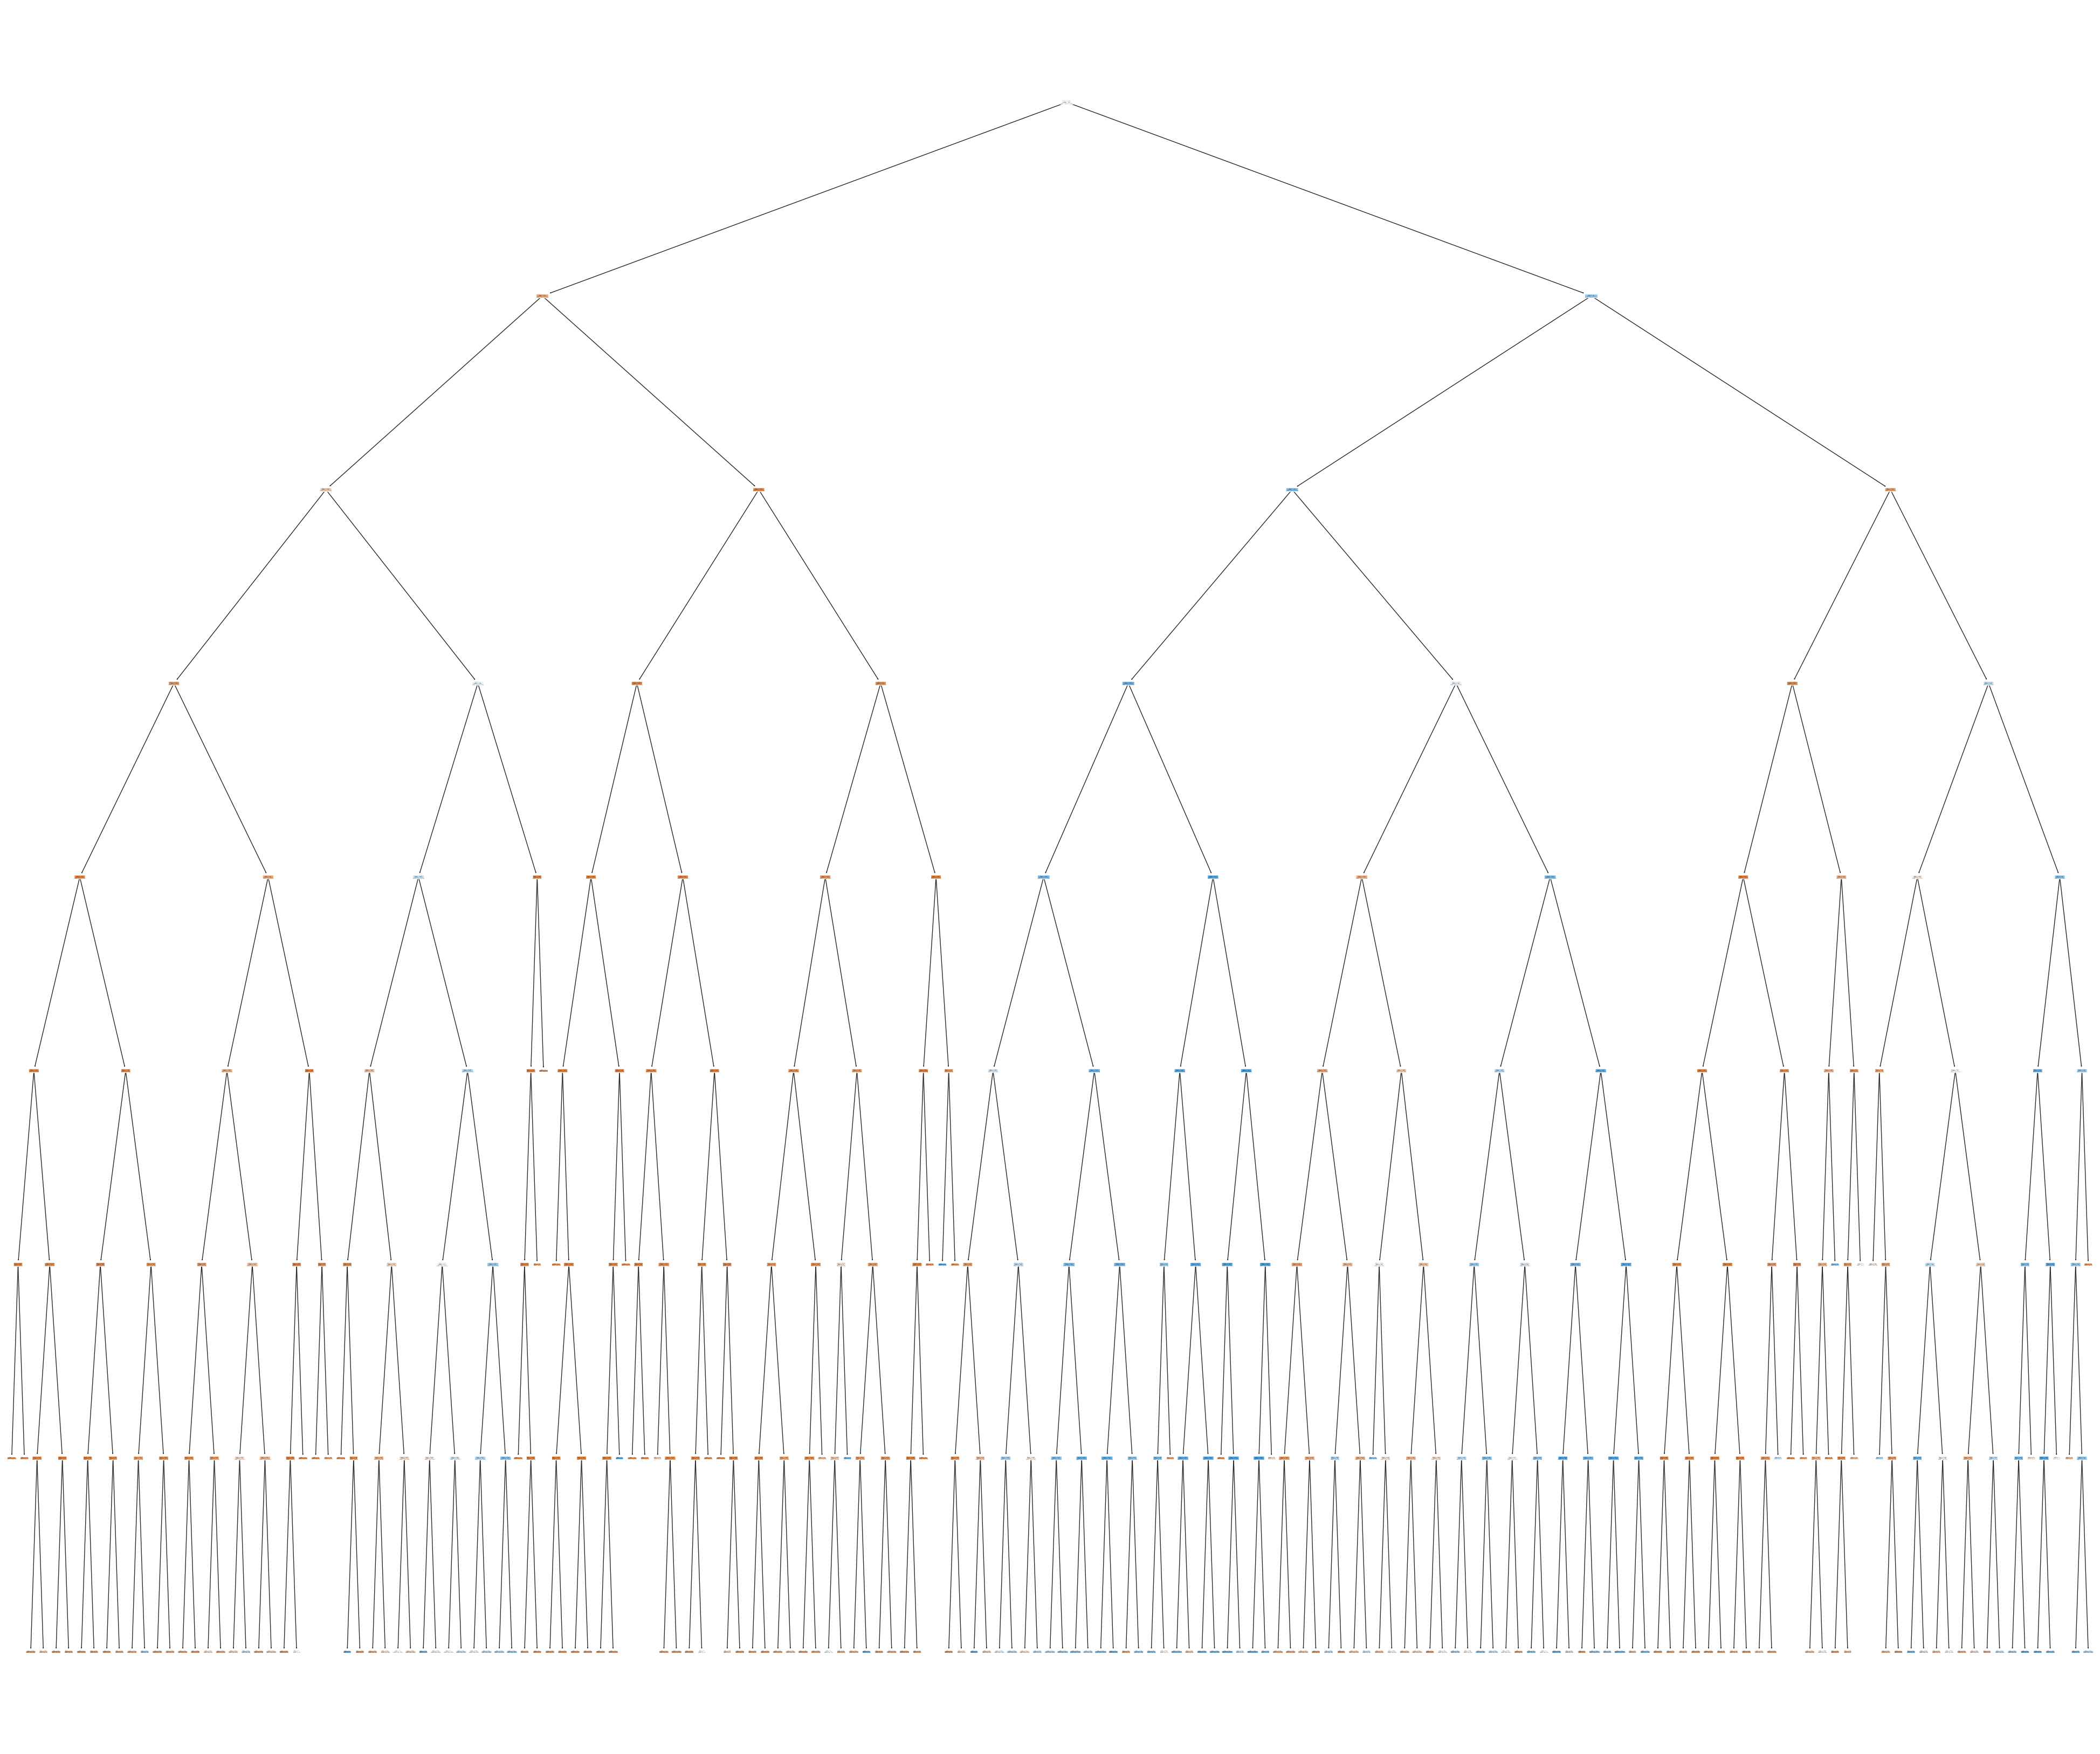

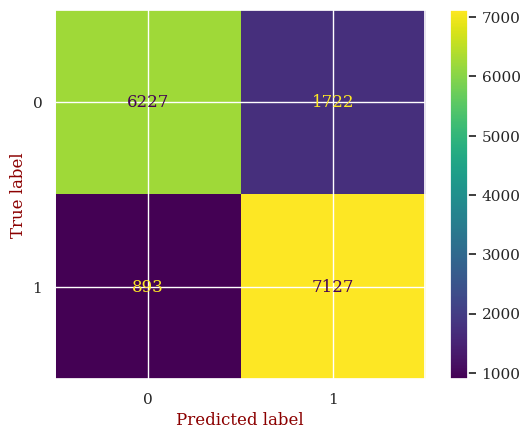

In [37]:
tuned_parameters = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [20, 30, 40],
    'min_samples_leaf': [1, 2],
    'max_features': [2, 3, 4],
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=5805), tuned_parameters)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

best_tree = grid_search.best_estimator_
# print(f'grid_search.best_estimator_ {grid_search.best_estimator_:.2f}')

best_tree.fit(X_train, y_train)
y_test_pred = best_tree.predict(X_test)
y_train_pred = best_tree.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Pre pruning Train accuracy :{accuracy_train:.2f}')
print(f'Pre pruning Test accuracy :{accuracy_test:.2f}')

plt.figure(figsize=(50, 42))
tree.plot_tree(best_tree, rounded=True, filled=True)
plt.show()

y_log_proba = best_tree.predict_proba(X_test)[::, 1]
accuracy = accuracy_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc_pre = roc_auc_score(y_test, y_log_proba)
fpr_pre_pruned, tpr_pre_pruned, _ = roc_curve(y_test, y_log_proba)
precision = precision_score(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_tree.classes_)
disp.plot()
plt.show()

pre_row = ['Pre-pruned', cm, precision, recall, specificity, f1, auc_pre]

In [38]:
# Downsampling the data for Post pruning as it is taking long time.
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=5805)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)
X_train = X_train_resampled[::2]
y_train = y_train_resampled[::2]
print(len(X_train))
print(len(y_train))

31902
31902


aplha = 0.0001317384


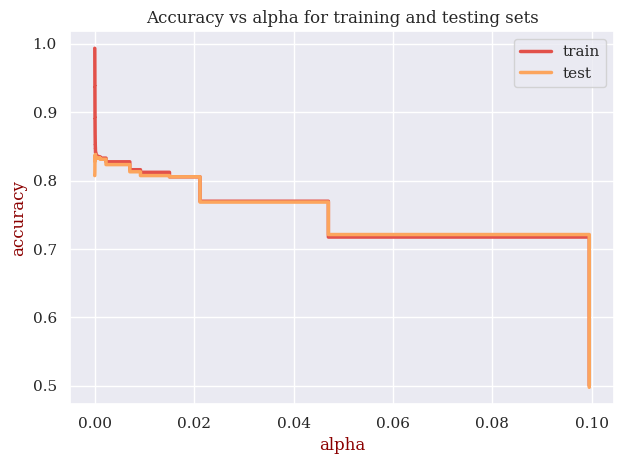

Post prune Train accuracy :0.85
Post prune Test accuracy :0.84
{'ccp_alpha': 0.00013173839572844584, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 5805, 'splitter': 'best'}


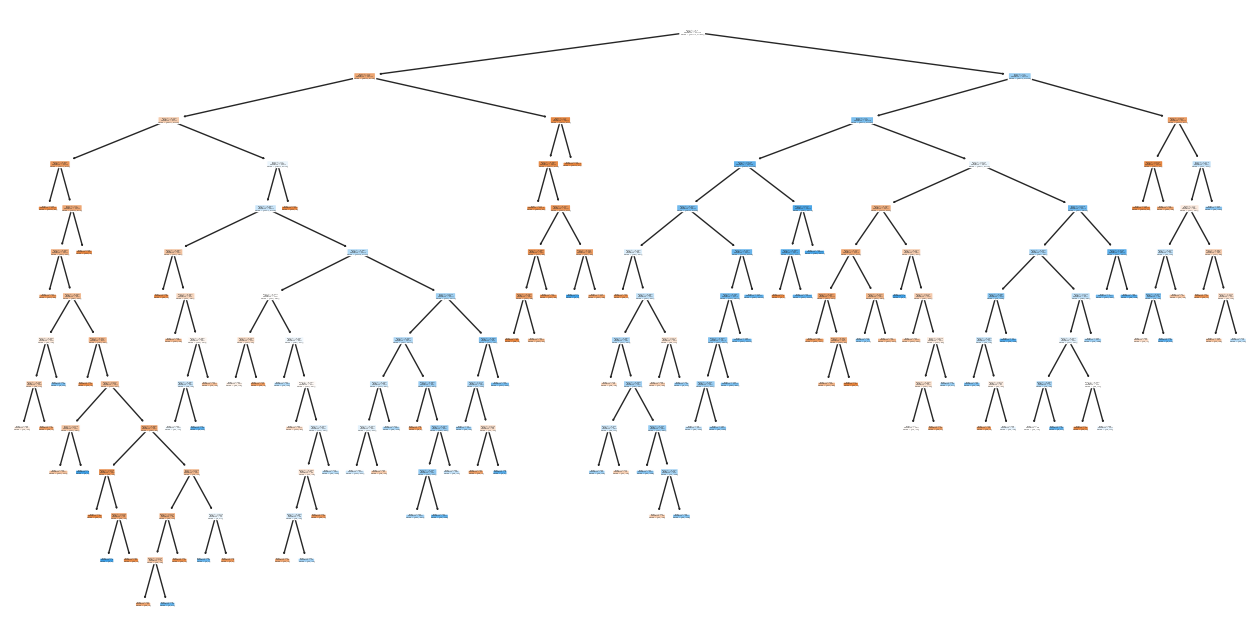

In [39]:
model_dtc = DecisionTreeClassifier(random_state=5805)
model_dtc.fit(X_train, y_train)
path = model_dtc.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']
# print(alphas)
accuracy_train, accuracy_test = [], []
for i in alphas:
    clf = DecisionTreeClassifier(ccp_alpha=i, random_state=5805)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
alpha = alphas[accuracy_test.index(max(accuracy_test))]
print(f'aplha = {alpha:.10f}')
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alphas, accuracy_train, label="train",
        drawstyle="steps-post")
ax.plot(alphas, accuracy_test, label="test",
        drawstyle="steps-post")
ax.legend()
plt.tight_layout()
plt.show()

clf = DecisionTreeClassifier(random_state=5805, ccp_alpha=alpha)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(f'Post prune Train accuracy :{accuracy_score(y_train, y_train_pred):.2f}')
print(f'Post prune Test accuracy :{accuracy_score(y_test, y_test_pred):.2f}')
print(clf.get_params())
plt.figure(figsize=(16, 8))
tree.plot_tree(clf, rounded=True, filled=True)
plt.show()

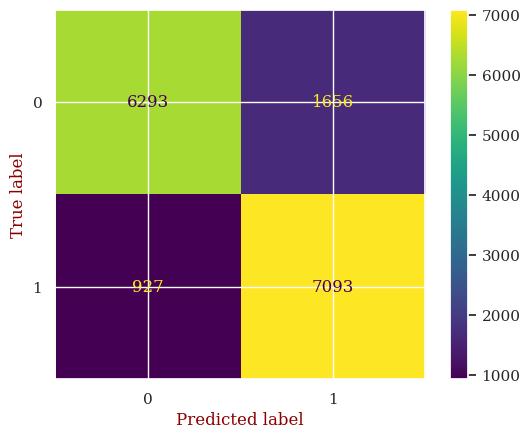

In [40]:
y_log_proba = clf.predict_proba(X_test)[::, 1]
accuracy = accuracy_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc_post = roc_auc_score(y_test, y_log_proba)
fpr_post_pruned, tpr_post_pruned, _ = roc_curve(y_test, y_log_proba)
precision = precision_score(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

post_row = ['Post-pruned', cm, precision, recall, specificity, f1, auc_post]

In [41]:
#Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X_std_res_enc, y_res_enc,
                                                    shuffle=True, test_size=0.2,
                                                    random_state=5805)
X_train.drop(eliminated_features, axis=1, inplace=True)
X_test.drop(eliminated_features, axis=1, inplace=True)

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logistic = LogisticRegression(random_state=5805)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5805)

grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=kfold, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
print(f'Logistic Regression Train accuracy: {accuracy_score(y_train, y_train_pred):.2f}')
print(f'Logistic Regression Test accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

C:\Users\rafad\.conda\envs\IV\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rafad\.conda\envs\IV\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rafad\.conda\envs\IV\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rafad\.conda\envs\IV\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Logistic Regression Train accuracy: 0.83
Logistic Regression Test accuracy: 0.83


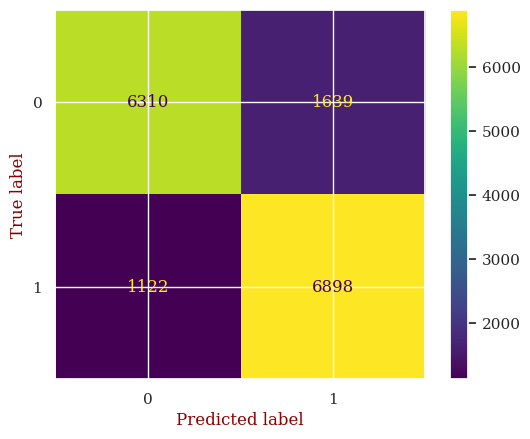

In [42]:
y_log_proba = grid_search.predict_proba(X_test)[::, 1]
accuracy = accuracy_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc_log = roc_auc_score(y_test, y_log_proba)
fpr_log, tpr_log, _ = roc_curve(y_test, y_log_proba)
precision = precision_score(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_test_pred)

log_row = ['Logistic', cm, precision, recall, specificity, f1, auc_log]


disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search.classes_)
disp.plot()
plt.show()

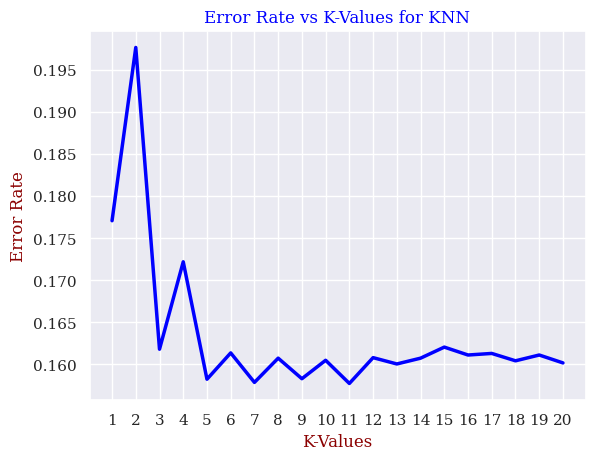

Fitting 2 folds for each of 30 candidates, totalling 60 fits
The best k is : {'n_neighbors': 25}


C:\Users\rafad\.conda\envs\IV\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K Nearest Neighbor Train accuracy: 0.85
K Nearest Neighbor Test accuracy: 0.84


In [43]:
#KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_std_res_enc, y_res_enc,
                                                    shuffle=True, test_size=0.2,
                                                    random_state=5805)
X_train.drop(eliminated_features, axis=1, inplace=True)
X_test.drop(eliminated_features, axis=1, inplace=True)

error_rates = []
k_values = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    error = 1 - knn.score(X_test, y_test)
    error_rates.append(error)
    k_values.append(k)

plt.plot(k_values, error_rates, color='b')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-Values for KNN', title_fontdict)
plt.xticks(k_values)
plt.grid(True)
plt.show()

#best k value from plot is 15

knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=2, scoring='accuracy', return_train_score=True, verbose=1)
grid_search = grid.fit(X_train, y_train.values.ravel())
print(f'The best k is : {grid_search.best_params_}')

knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)
print(f'K Nearest Neighbor Train accuracy: {accuracy_score(y_train, y_train_pred):.2f}')
print(f'K Nearest Neighbor Test accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

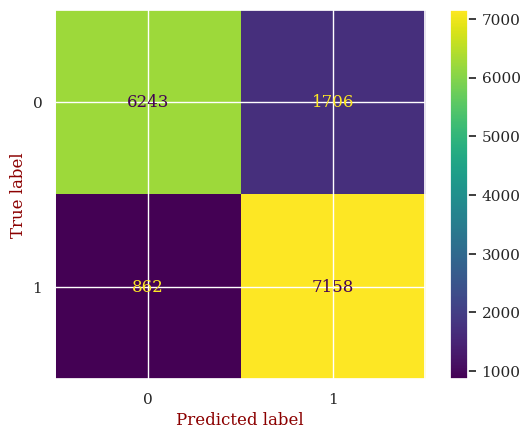

In [44]:
y_log_proba = knn.predict_proba(X_test)[::, 1]
accuracy = accuracy_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc_knn = roc_auc_score(y_test, y_log_proba)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_log_proba)
precision = precision_score(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

knn_row = ['K Neighbors Classifier', cm, precision, recall, specificity, f1, auc_knn]

In [45]:
# SVM
X_train, X_test, y_train, y_test = train_test_split(X_std_res_enc, y_res_enc,
                                                    shuffle=True, test_size=0.2,
                                                    random_state=5805)
X_train.drop(eliminated_features, axis=1, inplace=True)
X_test.drop(eliminated_features, axis=1, inplace=True)

# Downsampling the data as it is taking long time.
# undersample = RandomUnderSampler(sampling_strategy='auto', random_state=5805)
# X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)
# X_train = X_train_resampled[::4]
# y_train = y_train_resampled[::4]
# print(len(X_train))
# print(len(y_train))
# 
# param_grid = {
#     'C': [0.1, 1, 10],
#     'gamma': [0.1, 1, 10],
#     'kernel': ['linear', 'poly', 'rbf'],
#     'degree': [2, 3, 4]
# }
# 
# svm = SVC()
# 
# grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=2, scoring='accuracy')
# grid_search.fit(X_train, y_train.values.ravel())
# 
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# 
# print("SVM best Parameters:", best_params)
# print("SVM best Accuracy Score:", best_score)
# 
# best_svm = SVC(**best_params)
# best_svm.fit(X_train, y_train)
# 
# y_test_pred = svm.predict(X_test)
# y_train_pred = svm.predict(X_train)
# 
# print(f'Support Vector Machine Train accuracy: {accuracy_score(y_train, y_train_pred):.2f}')
# print(f'Support Vector Machine Test accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

# As GridSearchCV was taking more than 1 hour to execute even after downsampling. Considering manually defining individual SVM classifiers.

svm_linear = SVC(kernel='linear', probability=True, C=1.0)
svm_linear.fit(X_train, y_train.values.ravel())
y_test_pred = svm_linear.predict(X_test)
y_train_pred = svm_linear.predict(X_train)
print(f'Linear SVM Train accuracy: {accuracy_score(y_train, y_train_pred):.2f}')
print(f'Linear SVM Test accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

# svm_poly = SVC(kernel='poly', probability=True)
# svm_poly.fit(X_train, y_train.values.ravel())
# y_test_pred = svm_poly.predict(X_test)
# y_train_pred = svm_poly.predict(X_train)
# print(f'Polynomial SVM Train accuracy: {accuracy_score(y_train, y_train_pred):.2f}')
# print(f'Polynomial SVM Test accuracy: {accuracy_score(y_test, y_test_pred):.2f}')
# 
# svm = SVC(kernel='rbf', probability=True) 
# svm.fit(X_train, y_train.values.ravel())
# y_test_pred = svm.predict(X_test)
# y_train_pred = svm.predict(X_train)
# print(f'Radial basis function SVM Train accuracy: {accuracy_score(y_train, y_train_pred):.2f}')
# print(f'Radial basis function SVM Test accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

Linear SVM Train accuracy: 0.79
Linear SVM Test accuracy: 0.79


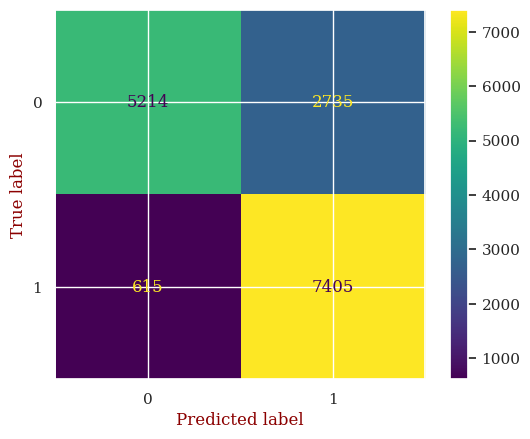

In [46]:
y_log_proba = svm_linear.predict_proba(X_test)[::, 1]
accuracy = accuracy_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc_svm = roc_auc_score(y_test, y_log_proba)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_log_proba)
precision = precision_score(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_linear.classes_)
disp.plot()
plt.show()

svm_row = ['Support Vector Machine', cm, precision, recall, specificity, f1, auc_svm]

In [47]:
# Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X_std_res_enc, y_res_enc, test_size=0.2, random_state=5805)
X_train.drop(eliminated_features, axis=1, inplace=True)
X_test.drop(eliminated_features, axis=1, inplace=True)


param_grid = {}

nb_classifier = GaussianNB()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5805)

grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=kfold, scoring='accuracy')

grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_params_

print("Best Parameters:", best_params)

y_test_pred = grid_search.predict(X_test)
y_train_pred = grid_search.predict(X_train)

print(f'Naive Bayes Train accuracy: {accuracy_score(y_train, y_train_pred):.2f}')
print(f'Naive Bayes Test accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

Best Parameters: {}
Naive Bayes Train accuracy: 0.78
Naive Bayes Test accuracy: 0.77


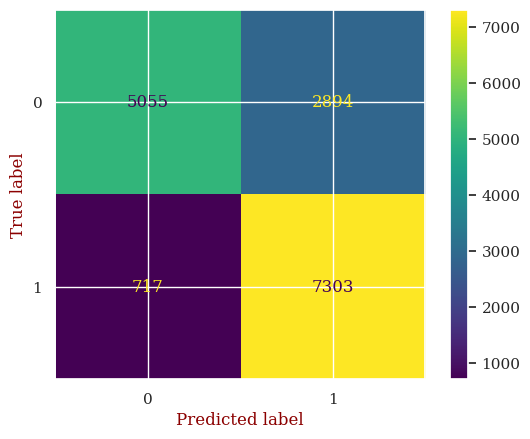

In [48]:
y_log_proba = grid_search.predict_proba(X_test)[::, 1]
accuracy = accuracy_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc_nb = roc_auc_score(y_test, y_log_proba)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_log_proba)
precision = precision_score(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search.classes_)
disp.plot()
plt.show()

nb_row = ['Naive Bayes', cm, precision, recall, specificity, f1, auc_nb]

In [49]:
# Random Forest - Stacking, Boosting and Bagging
X_train, X_test, y_train, y_test = train_test_split(X_std_res_enc, y_res_enc, test_size=0.2, random_state=5805)
X_train.drop(eliminated_features, axis=1, inplace=True)
X_test.drop(eliminated_features, axis=1, inplace=True)

rf_classifier = RandomForestClassifier(random_state=5805)
rf_classifier.fit(X_train, y_train.values.ravel())
y_train_pred = rf_classifier.predict(X_train)
print(f'Random forest Test accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

# Avoiding GridSearchCV as it takes more time
bagging_classifier = BaggingClassifier(base_estimator=rf_classifier, n_estimators=100, random_state=5805)

bagging_classifier.fit(X_train, y_train.values.ravel())
y_test_pred = bagging_classifier.predict(X_test)
y_train_pred = bagging_classifier.predict(X_train)

print(f'Bagging Classifer Train accuracy: {accuracy_score(y_train, y_train_pred):.2f}')
print(f'Bagging Classifer Test accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

Random forest Test accuracy: 0.77


C:\Users\rafad\.conda\envs\IV\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifer Train accuracy: 0.95
Bagging Classifer Test accuracy: 0.85


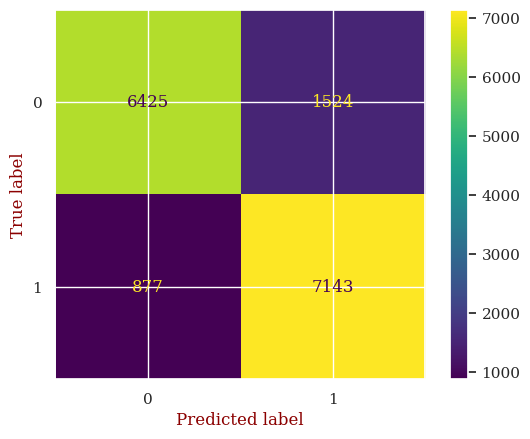

In [50]:
y_log_proba = bagging_classifier.predict_proba(X_test)[::, 1]
accuracy = accuracy_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc_rfb = roc_auc_score(y_test, y_log_proba)
fpr_rfb, tpr_rfb, _ = roc_curve(y_test, y_log_proba)
precision = precision_score(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=bagging_classifier.classes_)
disp.plot()
plt.show()

rfb_row = ['Bagging Classifier', cm, precision, recall, specificity, f1, auc_rfb]

In [51]:
estimators = [('rf', RandomForestClassifier(random_state=5805))]

stack_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

params = {
    'final_estimator__C': [1],
    'rf__n_estimators': [100],
    'rf__max_depth': [5, 10],
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5805)
grid_search = GridSearchCV(estimator=stack_classifier, param_grid=params, cv=kfold, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

y_test_pred = grid_search.predict(X_test)
y_train_pred = grid_search.predict(X_train)

print(f'Stacking Classifier Train accuracy: {accuracy_score(y_train, y_train_pred):.2f}')
print(f'Stacking Classifier Test accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

Best Parameters: {'final_estimator__C': 1, 'rf__max_depth': 10, 'rf__n_estimators': 100}
Stacking Classifier Train accuracy: 0.85
Stacking Classifier Test accuracy: 0.84


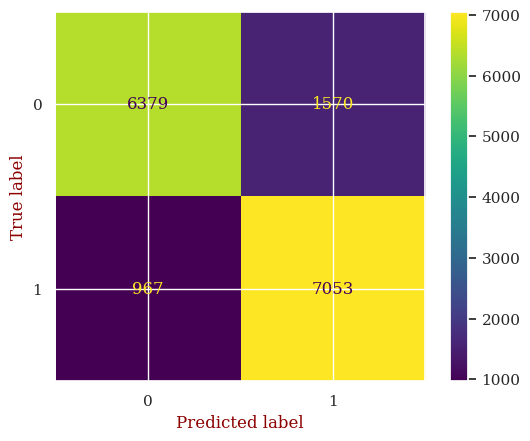

In [52]:
y_log_proba = grid_search.predict_proba(X_test)[::, 1]
accuracy = accuracy_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc_rfs = roc_auc_score(y_test, y_log_proba)
fpr_rfs, tpr_rfs, _ = roc_curve(y_test, y_log_proba)
precision = precision_score(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search.classes_)
disp.plot()
plt.show()

rfs_row = ['Stacking Classifier', cm, precision, recall, specificity, f1, auc_rfs]

In [53]:
adaboost_classifier = AdaBoostClassifier(estimator=rf_classifier, random_state=5805)

adaboost_classifier.fit(X_train, y_train.values.ravel())
# Avoiding GridSearchCV as it takes more time
y_test_pred = adaboost_classifier.predict(X_test)
y_train_pred = adaboost_classifier.predict(X_train)

print(f'AdaBoost Classifier Train accuracy: {accuracy_score(y_train, y_train_pred):.2f}')
print(f'AdaBoost Classifier Test accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

AdaBoost Classifier Train accuracy: 0.99
AdaBoost Classifier Test accuracy: 0.85


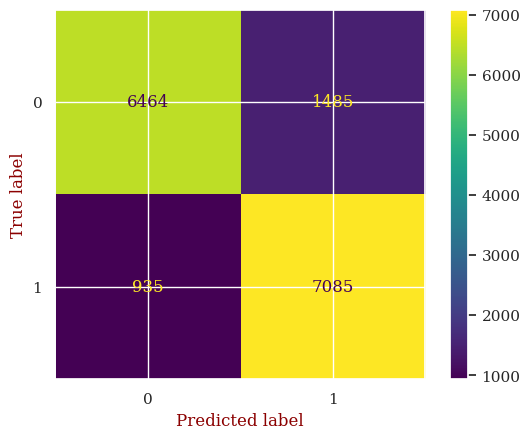

In [54]:
y_log_proba = adaboost_classifier.predict_proba(X_test)[::, 1]
accuracy = accuracy_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc_rfboost = roc_auc_score(y_test, y_log_proba)
fpr_rfboost, tpr_rfboost, _ = roc_curve(y_test, y_log_proba)
precision = precision_score(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=adaboost_classifier.classes_)
disp.plot()
plt.show()

rfboost_row = ['AdaBoost Classifier', cm, precision, recall, specificity, f1, auc_rfboost]

In [55]:
# Multi-layer perceptron
X_train, X_test, y_train, y_test = train_test_split(X_std_res_enc, y_res_enc, test_size=0.2, random_state=5805)
X_train.drop(eliminated_features, axis=1, inplace=True)
X_test.drop(eliminated_features, axis=1, inplace=True)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'max_iter': [200, 400],
}

mlp_classifier = MLPClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5805)

grid_search = GridSearchCV(mlp_classifier, param_grid, cv=kfold, scoring='accuracy')

grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

y_test_pred = best_estimator.predict(X_test)
y_train_pred = best_estimator.predict(X_train)

print(f'Multi-layer Perceptron Train accuracy: {accuracy_score(y_train, y_train_pred):.2f}')
print(f'Multi-layer Perceptron Test accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'max_iter': 400, 'solver': 'adam'}
Multi-layer Perceptron Train accuracy: 0.83
Multi-layer Perceptron Test accuracy: 0.83


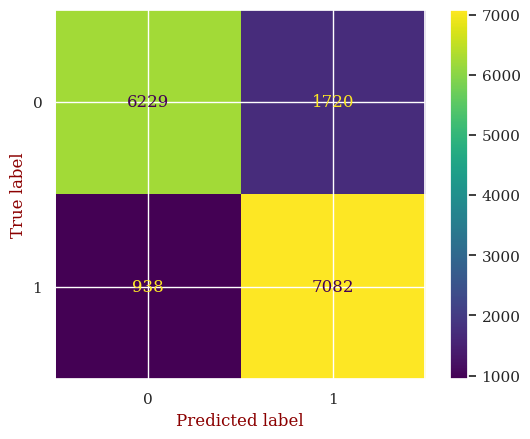

In [56]:
y_log_proba = grid_search.predict_proba(X_test)[::, 1]
accuracy = accuracy_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc_mlp = roc_auc_score(y_test, y_log_proba)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_log_proba)
precision = precision_score(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search.classes_)
disp.plot()
plt.show()

mlp_row = ['Multi-layer Perceptron', cm, precision, recall, specificity, f1, auc_mlp]

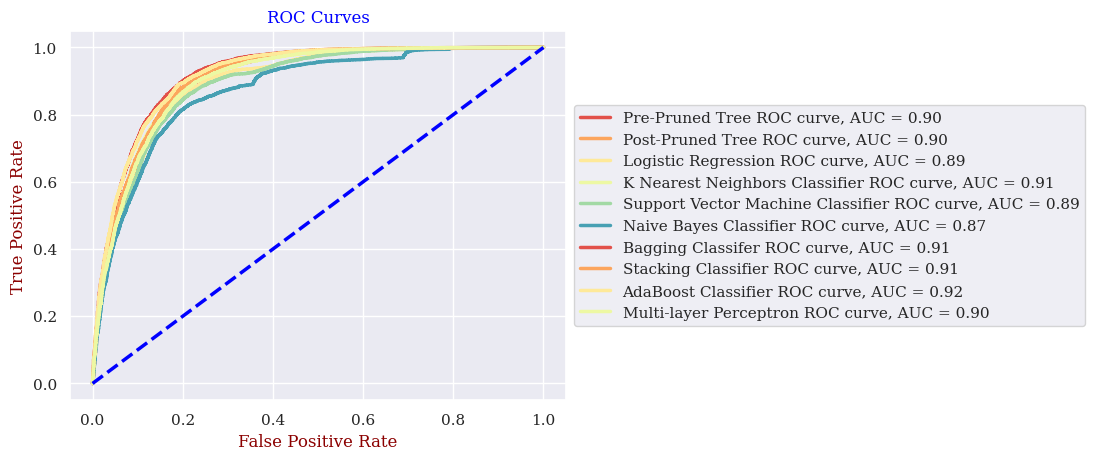

Table
+-------------------------------------------------------------------------------------------------+
|                                         Model comparison                                        |
+------------------------+-------------------+-----------+--------+-------------+----------+------+
|         Model          | Confustion Matrix | Precision | Recall | Specificity | F1 Score | AUC  |
+------------------------+-------------------+-----------+--------+-------------+----------+------+
|       Pre-pruned       |    [[6227 1722]   |    0.81   |  0.89  |     0.78    |   0.84   | 0.90 |
|                        |    [ 893 7127]]   |           |        |             |          |      |
+------------------------+-------------------+-----------+--------+-------------+----------+------+
|      Post-pruned       |    [[6293 1656]   |    0.81   |  0.88  |     0.79    |   0.85   | 0.90 |
|                        |    [ 927 7093]]   |           |        |             |          |  

In [57]:
plt.plot(fpr_pre_pruned, tpr_pre_pruned, label=f'Pre-Pruned Tree ROC curve, AUC = {auc_pre:.2f}')
plt.plot(fpr_post_pruned, tpr_post_pruned, label=f'Post-Pruned Tree ROC curve, AUC = {auc_post:.2f}')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression ROC curve, AUC = {auc_log:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'K Nearest Neighbors Classifier ROC curve, AUC = {auc_knn:.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine Classifier ROC curve, AUC = {auc_svm:.2f}')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes Classifier ROC curve, AUC = {auc_nb:.2f}')
plt.plot(fpr_rfb, tpr_rfb, label=f'Bagging Classifer ROC curve, AUC = {auc_rfs:.2f}')
plt.plot(fpr_rfs, tpr_rfs, label=f'Stacking Classifier ROC curve, AUC = {auc_rfs:.2f}')
plt.plot(fpr_rfboost, tpr_rfboost, label=f'AdaBoost Classifier ROC curve, AUC = {auc_rfboost:.2f}')
plt.plot(fpr_mlp, tpr_mlp, label=f'Multi-layer Perceptron ROC curve, AUC = {auc_mlp:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves', title_fontdict)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

print("Table")
accuracy_table_b = PrettyTable()
accuracy_table_b.field_names = ['Model', 'Confustion Matrix', 'Precision', 'Recall', 'Specificity', 'F1 Score', 'AUC']
accuracy_table_b.add_row(pre_row)
accuracy_table_b.add_row(post_row)
accuracy_table_b.add_row(log_row)
accuracy_table_b.add_row(knn_row)
accuracy_table_b.add_row(svm_row)
accuracy_table_b.add_row(nb_row)
accuracy_table_b.add_row(rfb_row)
accuracy_table_b.add_row(rfs_row)
accuracy_table_b.add_row(rfboost_row)
accuracy_table_b.add_row(mlp_row)

accuracy_table_b.hrules = ALL
accuracy_table_b.float_format = ".2"
print(accuracy_table_b.get_string(title='Model comparison'))


C:\Users\rafad\.conda\envs\IV\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rafad\.conda\envs\IV\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rafad\.conda\envs\IV\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rafad\.conda\envs\IV\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

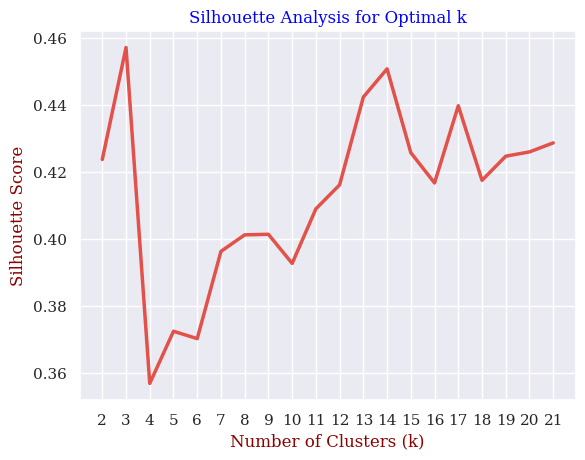

In [58]:
# Phase 4
# K Means
X_train, X_test, y_train, y_test = train_test_split(X_std_res_enc, y_res_enc, test_size=0.2, random_state=5805)
X_train.drop(eliminated_features, axis=1, inplace=True)
X_test.drop(eliminated_features, axis=1, inplace=True)

# Silhouette Method for selection of K
k_values = range(2, 22)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=5805)
    labels = kmeans.fit_predict(X_train)
    silhouette_avg_score = silhouette_score(X_train, labels)
    silhouette_scores.append(silhouette_avg_score)

plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k', title_fontdict)
plt.xticks(k_values)
plt.show()

C:\Users\rafad\.conda\envs\IV\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rafad\.conda\envs\IV\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rafad\.conda\envs\IV\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rafad\.conda\envs\IV\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

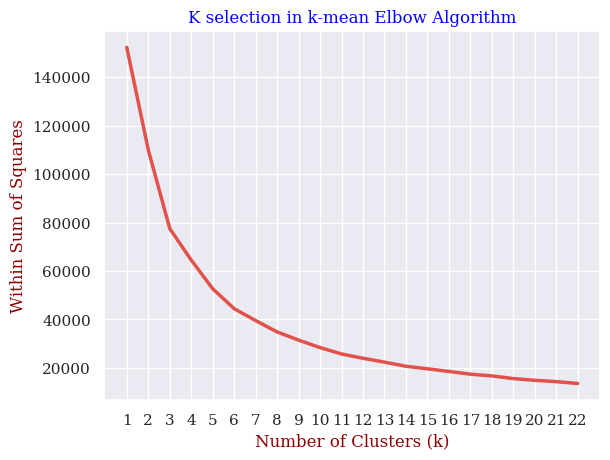

C:\Users\rafad\.conda\envs\IV\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rafad\.conda\envs\IV\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


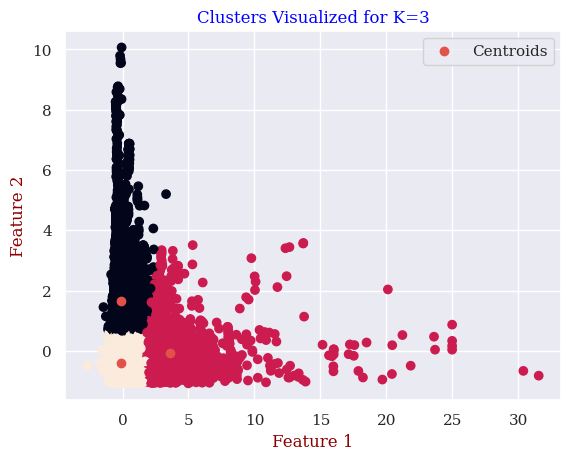

In [60]:
# Elbow Method Within cluster Sum of Squared Errors (WSS)
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax + 1):
        kmeans = KMeans(n_clusters=k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += np.sum((points[i] - curr_center) ** 2)
        sse.append(curr_sse)
    return sse

k = 22
sse = calculate_WSS(X_train.values, k)
plt.figure()
plt.plot(np.arange(1,k+1,1), sse)
plt.xticks(np.arange(1,k+1,1))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within Sum of Squares')
plt.title('K selection in k-mean Elbow Algorithm', title_fontdict)
plt.show()

optimal_k = 3 # K from silhouette and Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=5805)
kmeans.fit(X_train, y_train)

cluster_labels = kmeans.fit_predict(X_train)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=cluster_labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], label='Centroids')
plt.title('Clusters Visualized for K=3', title_fontdict)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [61]:
# Apriori Algorithm
X_train, X_test, y_train, y_test = train_test_split(X_std_res_enc, y_res_enc, test_size=0.2, random_state=5805)

X_train['balance'] = pd.cut(X_train['balance'], bins=3, labels=['balance_low', 'balance_medium', 'balance_high'])
X_train['duration'] = pd.cut(X_train['duration'], bins=3, labels=['duration_low', 'duration_medium', 'duration_high'])


categorical_one_hot = ['subscribed', 'marital_married', 'marital_single', 'default_yes', 'loan_yes', 'housing_yes',]  

apriori_data = df_std_res_enc[categorical_one_hot]

transactions = apriori_data.values.tolist()

min_support = 0.02  
frequent_itemsets = apriori(apriori_data, min_support=min_support, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print("Table")

frequent_itemsets_table = PrettyTable()
frequent_itemsets_table.field_names = ["Itemsets", "Support"]

for idx, itemset in frequent_itemsets.iterrows():
    frequent_itemsets_table.add_row([list(itemset['itemsets']), itemset['support']])

rules_table = PrettyTable()
rules_table.field_names = ["Rule", "Support", "Confidence", "Lift"]

for idx, rule in rules.iterrows():
    rules_table.add_row([f"{list(rule['antecedents'])} -> {list(rule['consequents'])}",
                         rule['support'], rule['confidence'], rule['lift']])

rules_table.float_format = ".2"
rules_table.hrules = ALL
print(rules_table.get_string(title='Rules table'))

frequent_itemsets_table.float_format = ".2"
frequent_itemsets_table.hrules = ALL
print(frequent_itemsets_table.get_string(title='Frequent Itemset table'))

Table
+----------------------------------------------------------------------------------+
|                                   Rules table                                    |
+----------------------------------------------------+---------+------------+------+
|                        Rule                        | Support | Confidence | Lift |
+----------------------------------------------------+---------+------------+------+
|        ['loan_yes'] -> ['marital_married']         |   0.06  |    0.63    | 1.35 |
+----------------------------------------------------+---------+------------+------+
|        ['marital_married'] -> ['loan_yes']         |   0.06  |    0.13    | 1.35 |
+----------------------------------------------------+---------+------------+------+
|       ['housing_yes'] -> ['marital_married']       |   0.21  |    0.54    | 1.17 |
+----------------------------------------------------+---------+------------+------+
|       ['marital_married'] -> ['housing_yes']       |   0.

C:\Users\rafad\.conda\envs\IV\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
